In [48]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from utils import *
from scipy.stats import zscore
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from loess import loess_1d
import matplotlib.patches as mpatches
from matplotlib import cm
from operator import * 

In [49]:
x = pd.read_csv('data/T47D.csv')

metadata_well = x["Metadata_well"]
phase = x["phase"]

x0_phase = x["phase"][metadata_well == 0]
x1_phase = x["phase"][metadata_well == 1]
x10_phase = x["phase"][metadata_well == 10]
x100_phase = x["phase"][metadata_well == 100]
x1000_phase = x["phase"][metadata_well == 1000]

x = x.drop(["phase", 'Metadata_well'], axis=1)

# normalize all data in a column 
x = x.apply(zscore)

# separate data according to treatment condition
x0 = x[metadata_well == 0]
x1 = x[metadata_well == 1]
x10 = x[metadata_well == 10]
x100 = x[metadata_well == 100]
x1000 = x[metadata_well == 1000]

x

AreaShape_Area  Intensity_IntegratedIntensity_DNA  \
0           -0.926708                          -0.458879   
1           -1.245438                          -0.453973   
2           -0.428693                          -0.524069   
3            0.773184                           1.365078   
4           -0.415413                          -0.513221   
...               ...                                ...   
64497       -1.411443                          -1.082969   
64498        0.507576                           1.177778   
64499       -0.561497                          -0.439588   
64500       -0.335730                          -0.416980   
64501        0.122444                          -0.613439   

       Intensity_MedianIntensity_CDK2  Intensity_MedianIntensity_CDK4  \
0                            1.322612                        0.976904   
1                            1.380743                        1.118071   
2                           -1.129765                       -1.111307   
3                            0.991996                       -0.003277   
4                            0.339845                       -0.884906   
...                               ...                             ...   
64497                       -0.837296                       -0.987452   
64498                        0.356194                       -0.490703   
64499                        0.278081                        2.664252   
64500                       -0.174246                       -0.227014   
64501                       -0.995338                       -0.996775   

       Intensity_MedianIntensity_CDK6  Intensity_MedianIntensity_Cdh1  \
0                            0.062764                        0.145205   
1                            0.339295                        0.705600   
2                           -0.609492                       -0.881059   
3                           -0.104108                        0.536806   
4                           -0.804970                       -0.016837   
...                               ...                             ...   
64497                       -0.249525                       -0.168751   
64498                        0.224868                       -0.185630   
64499                        0.582451                        0.286992   
64500                       -0.015904                        0.070936   
64501                        0.038925                       -0.266651   

       Intensity_MedianIntensity_Cdt1  Intensity_MedianIntensity_E2F1  \
0                            2.516578                        0.407586   
1                            0.356098                       -0.268247   
2                           -0.406767                       -0.756349   
3                           -0.377650                       -0.503954   
4                           -0.170920                       -0.630151   
...                               ...                             ...   
64497                       -0.245168                       -0.550887   
64498                       -0.415502                       -0.416346   
64499                       -0.127244                        0.002921   
64500                       -0.581469                        0.815381   
64501                       -0.572734                       -0.614507   

       Intensity_MedianIntensity_ER  Intensity_MedianIntensity_Ki67  \
0                          0.319061                        0.171325   
1                          1.292693                        0.778215   
2                         -1.394264                       -0.090779   
3                          0.457196                        3.020565   
4                         -0.713613                        1.364434   
...                             ...                             ...   
64497                      0.039448                       -0.447140   
64498                      1.000826                       -0.438872   
64499           

In [50]:
# establish variables
trt_conditions: list[str] = ["", "0", "1", "10", "100", "1000"]

phases_dict = {'G0':'#5CAD92', 
               'G1':'#594997', 
               'G2/M':'#E7739A',
               'S':'#0099CC'}

features = [
    'Area',
    'DNA',
    'CDK2',
    'CDK4',
    'CDK6',
    'Cdh1',
    'Cdt1',
    'E2F1',
    'ER',
    'Ki67',
    'PR',
    'RB',
    'Skp2',
    'cycA',
    'cycB1',
    'cycD1',
    'cycE',
    'p21',
    'pRB',
    'pRB_over_RB',
]

feature_cols = x.columns

viridis = cm.get_cmap('viridis', 12)
trt_colors = viridis(np.linspace(0, 1, 5))
trt_colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.220057, 0.343307, 0.549413, 1.      ],
       [0.119512, 0.607464, 0.540218, 1.      ],
       [0.525776, 0.833491, 0.288127, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [51]:
x0_phase = x0_phase.to_numpy()
x1_phase = x1_phase.to_numpy()
x10_phase = x10_phase.to_numpy()
x100_phase = x100_phase.to_numpy()
x1000_phase = x1000_phase.to_numpy()

In [52]:
# assign colors according to phase 
x0_phase_colors = []
x1_phase_colors = []
x10_phase_colors = []
x100_phase_colors = []
x1000_phase_colors = []

for i in range(len(x0_phase)): 
    x0_phase_colors.append(phases_dict[x0_phase[i]])

for i in range(len(x1_phase)): 
    x1_phase_colors.append(phases_dict[x1_phase[i]])

for i in range(len(x10_phase)): 
    x10_phase_colors.append(phases_dict[x10_phase[i]])

for i in range(len(x100_phase)): 
    x100_phase_colors.append(phases_dict[x100_phase[i]])

for i in range(len(x1000_phase)): 
    x1000_phase_colors.append(phases_dict[x1000_phase[i]])

In [53]:
# calculate percentage of cells in each phase
g0_0 = countOf(x0_phase, "G0")/len(x0_phase)
g1_0 = countOf(x0_phase, "G1")/len(x0_phase)
s_0 = countOf(x0_phase, "S")/len(x0_phase)
g2m_0 = countOf(x0_phase, "G2/M")/len(x0_phase)

g0_1 = countOf(x1_phase, "G0")/len(x1_phase)
g1_1 = countOf(x1_phase, "G1")/len(x1_phase)
s_1 = countOf(x1_phase, "S")/len(x1_phase)
g2m_1 = countOf(x1_phase, "G2/M")/len(x1_phase)

g0_10 = countOf(x10_phase, "G0")/len(x10_phase)
g1_10 = countOf(x10_phase, "G1")/len(x10_phase)
s_10 = countOf(x10_phase, "S")/len(x10_phase)
g2m_10 = countOf(x10_phase, "G2/M")/len(x10_phase)

g0_100 = countOf(x100_phase, "G0")/len(x100_phase)
g1_100 = countOf(x100_phase, "G1")/len(x100_phase)
s_100 = countOf(x100_phase, "S")/len(x100_phase)
g2m_100 = countOf(x100_phase, "G2/M")/len(x100_phase)

g0_1000 = countOf(x1000_phase, "G0")/len(x1000_phase)
g1_1000 = countOf(x1000_phase, "G1")/len(x1000_phase)
s_1000 = countOf(x1000_phase, "S")/len(x1000_phase)
g2m_1000 = countOf(x1000_phase, "G2/M")/len(x1000_phase)

/var/folders/9p/p4yl9s1d43b3by_cf1ct1pl80000gn/T/ipykernel_38895/3879181025.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(phase_colors_list, labels=phases_list, loc='best')


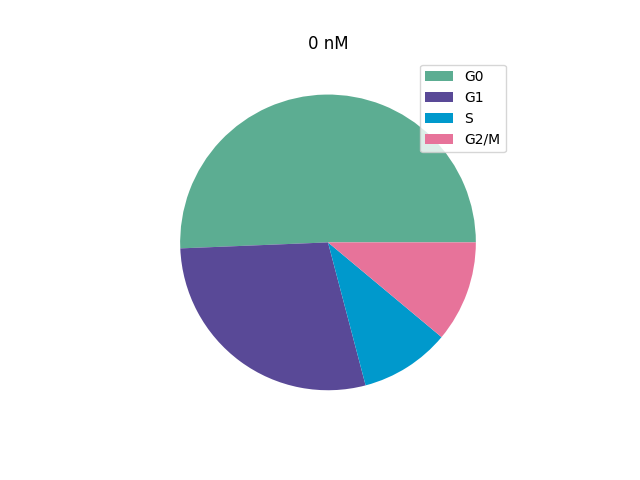

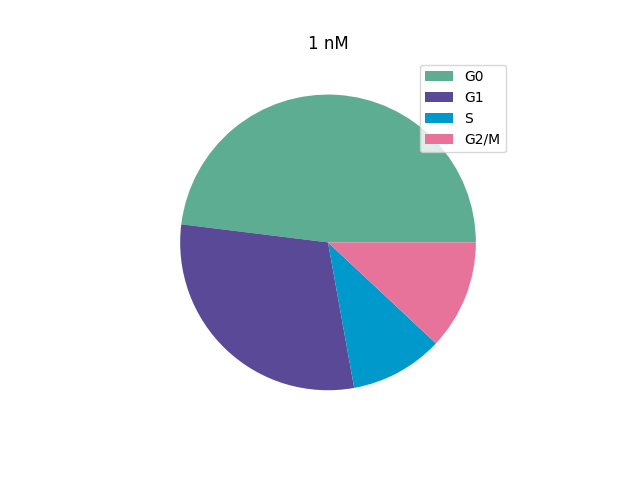

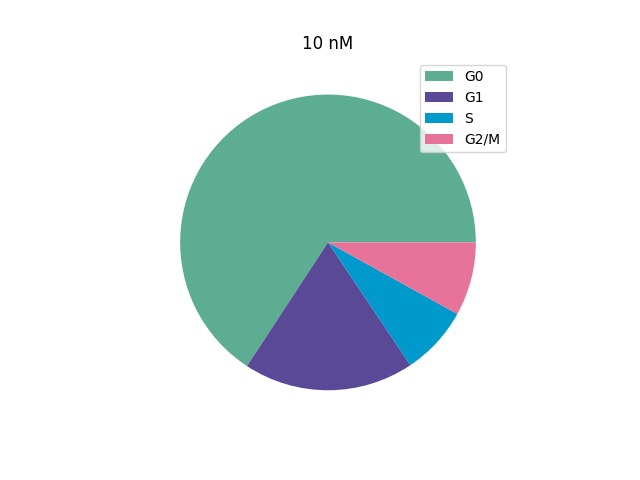

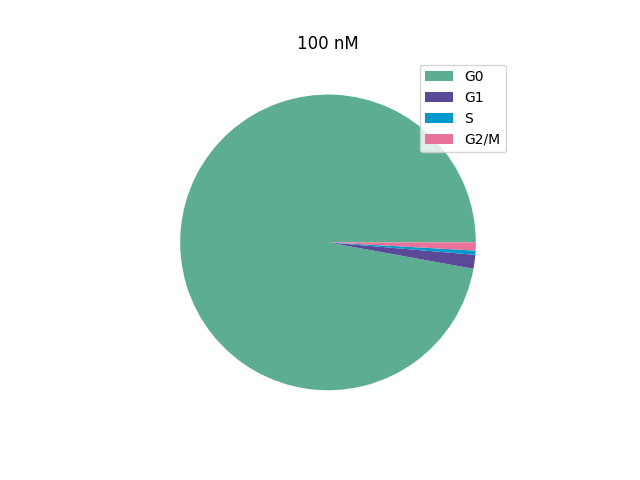

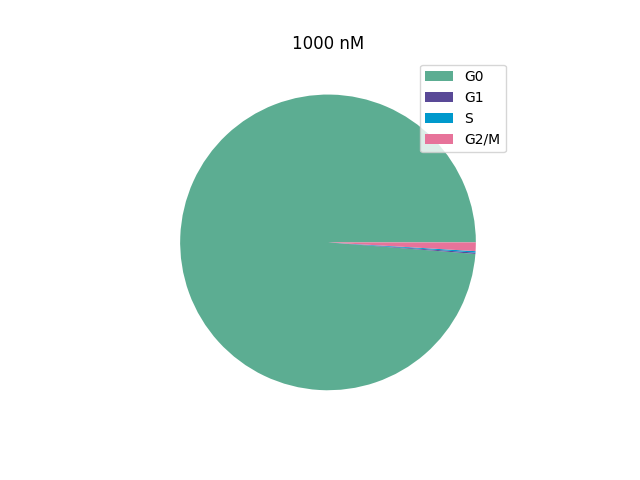

In [54]:
phase_colors_list = [
    phases_dict['G0'],
    phases_dict['G1'],
    phases_dict['S'],
    phases_dict['G2/M']
]

phases_list = ['G0', 'G1', 'S', 'G2/M']

for i in range(1, len(trt_conditions)):
    phase_prop = np.array([
        vars()[f'g0_{trt_conditions[i]}'],
        vars()[f'g1_{trt_conditions[i]}'],
        vars()[f's_{trt_conditions[i]}'],
        vars()[f'g2m_{trt_conditions[i]}']
    ])
    fig, ax = plt.subplots()
    ax.pie(np.array(phase_prop), colors=phase_colors_list)
    ax.set_title(f'{trt_conditions[i]} nM')
    plt.legend(phase_colors_list, labels=phases_list, loc='best')
    plt.show()

## Perform SPCA 

In [55]:
# global hypersphere 
c,r,V = Spherelets(x, 2)

# individual hyperspheres per treatment condition 
x0_c, x0_r, x0_V = Spherelets(x0, 2)
x1_c, x1_r, x1_V = Spherelets(x1, 2)
x10_c, x10_r, x10_V = Spherelets(x10, 2)
x100_c, x100_r, x100_V = Spherelets(x100, 2)
x1000_c, x1000_r, x1000_V = Spherelets(x1000, 2)

# calculate projections for each treatment condition onto global hypersphere
x0_proj = Proj(x0, x0_r, x0_c, V)
x1_proj = Proj(x1, x1_r, x1_c, V)
x10_proj = Proj(x10, x10_r, x10_c, V)
x100_proj = Proj(x100, x100_r, x100_c, V)
x1000_proj = Proj(x1000, x1000_r, x1000_c, V)

In [56]:
x0_proj = x0_proj.to_numpy()
x1_proj = x1_proj.to_numpy()
x10_proj = x10_proj.to_numpy()
x100_proj = x100_proj.to_numpy()
x1000_proj = x1000_proj.to_numpy()

### Center Values

In [57]:
# center values 
for i in range(len(features)): 
    vars()[f'{features[i]}'] = [x0_c[i][0], x1_c[i][0], x10_c[i][0], x100_c[i][0], x1000_c[i][0]]

centers = pd.DataFrame(list(zip(trt_conditions[1:], Area, DNA, CDK2, CDK4, CDK6, Cdh1, Cdt1, E2F1, ER, Ki67, PR, RB, Skp2, cycA, cycB1, cycD1, cycE, p21, pRB, pRB_over_RB)), columns=['Treatment'] + features)
centers

Treatment      Area       DNA      CDK2      CDK4      CDK6      Cdh1  \
0         0  0.192010  0.611243  0.987563  0.189204  0.763804  0.817071   
1         1  0.212745  0.665796  1.235818  0.360159  0.718182  0.986268   
2        10  0.240318  0.643368  0.735622  0.634487  0.827152  0.748580   
3       100  0.864397  0.685463 -0.100131 -0.060646  0.189312  0.680248   
4      1000  0.832362  0.790094  0.548639  0.565456  0.758763  0.084539   

       Cdt1      E2F1        ER  ...        PR        RB      Skp2      cycA  \
0  0.498587  0.281201  0.865892  ...  0.773186  0.713495  1.175513  1.264695   
1  0.357225  0.212534  0.955274  ...  0.795150  0.614663  1.085402  1.112358   
2  0.461076  0.415317  1.088923  ...  0.445305  0.735673  0.861689  0.852243   
3 -0.030615  0.111137  0.311924  ...  0.035551  0.088377 -0.089978  0.132530   
4 -0.250730 -0.238277  0.602360  ...  0.268908 -0.443810 -0.181147  0.100128   

      cycB1     cycD1      cycE       p21       pRB  pRB_over_RB  
0  1.228059  0.021703  0.508103  0.659121  0.920029     0.742549  
1  1.239972 -0.027345  0.589505  0.730759  0.926646     0.829770  
2  0.858630  0.251087  0.797607  0.582681  0.759939     0.547068  
3  0.137471  0.592928 -0.083950  0.387386 -0.161672    -0.208083  
4  0.316402  0.653404  0.530754  0.496522 -0.556512    -0.491351  

[5 rows x 21 columns]

In [58]:
centers.to_csv("data/center_features.csv", index=False)

### Center Shifts from Untreated Condition

In [59]:
for i in range(len(features)): 
    vars()[f'{features[i]}'] = [x1_c[i][0]-x0_c[i][0], x10_c[i][0]-x0_c[i][0], x100_c[i][0]-x0_c[i][0], x1000_c[i][0]-x0_c[i][0]]

center_shifts = pd.DataFrame(list(zip(trt_conditions[2:], Area, DNA, CDK2, CDK4, CDK6, Cdh1, Cdt1, E2F1, ER, Ki67, PR, RB, Skp2, cycA, cycB1, cycD1, cycE, p21, pRB, pRB_over_RB)), columns=['Treatment'] + features)
center_shifts

Treatment      Area       DNA      CDK2      CDK4      CDK6      Cdh1  \
0         1  0.020735  0.054554  0.248255  0.170955 -0.045622  0.169197   
1        10  0.048308  0.032126 -0.251941  0.445282  0.063347 -0.068491   
2       100  0.672387  0.074220 -1.087694 -0.249851 -0.574493 -0.136823   
3      1000  0.640353  0.178852 -0.438924  0.376251 -0.005041 -0.732532   

       Cdt1      E2F1        ER  ...        PR        RB      Skp2      cycA  \
0 -0.141362 -0.068667  0.089382  ...  0.021964 -0.098832 -0.090110 -0.152337   
1 -0.037510  0.134116  0.223031  ... -0.327881  0.022178 -0.313823 -0.412452   
2 -0.529202 -0.170064 -0.553968  ... -0.737635 -0.625118 -1.265491 -1.132165   
3 -0.749317 -0.519477 -0.263533  ... -0.504278 -1.157305 -1.356660 -1.164567   

      cycB1     cycD1      cycE       p21       pRB  pRB_over_RB  
0  0.011913 -0.049048  0.081402  0.071638  0.006617     0.087221  
1 -0.369429  0.229385  0.289505 -0.076440 -0.160089    -0.195481  
2 -1.090589  0.571225 -0.592052 -0.271735 -1.081700    -0.950632  
3 -0.911657  0.631701  0.022651 -0.162599 -1.476540    -1.233900  

[4 rows x 21 columns]

In [60]:
center_shifts.to_csv("data/center_shifts.csv", index=False)

In [61]:
# reduce digits for plot 
x1_x0_c = []
x10_x0_c = []
x100_x0_c = []
x1000_x0_c = []
x10000_x0_c = []

for i in range(len(x0_c)): 
    x1_x0_c.append(round(x1_c[i][0]-x0_c[i][0], 2))
    x10_x0_c.append(round(x10_c[i][0]-x0_c[i][0], 2))
    x100_x0_c.append(round(x100_c[i][0]-x0_c[i][0], 2))
    x1000_x0_c.append(round(x1000_c[i][0]-x0_c[i][0], 2))


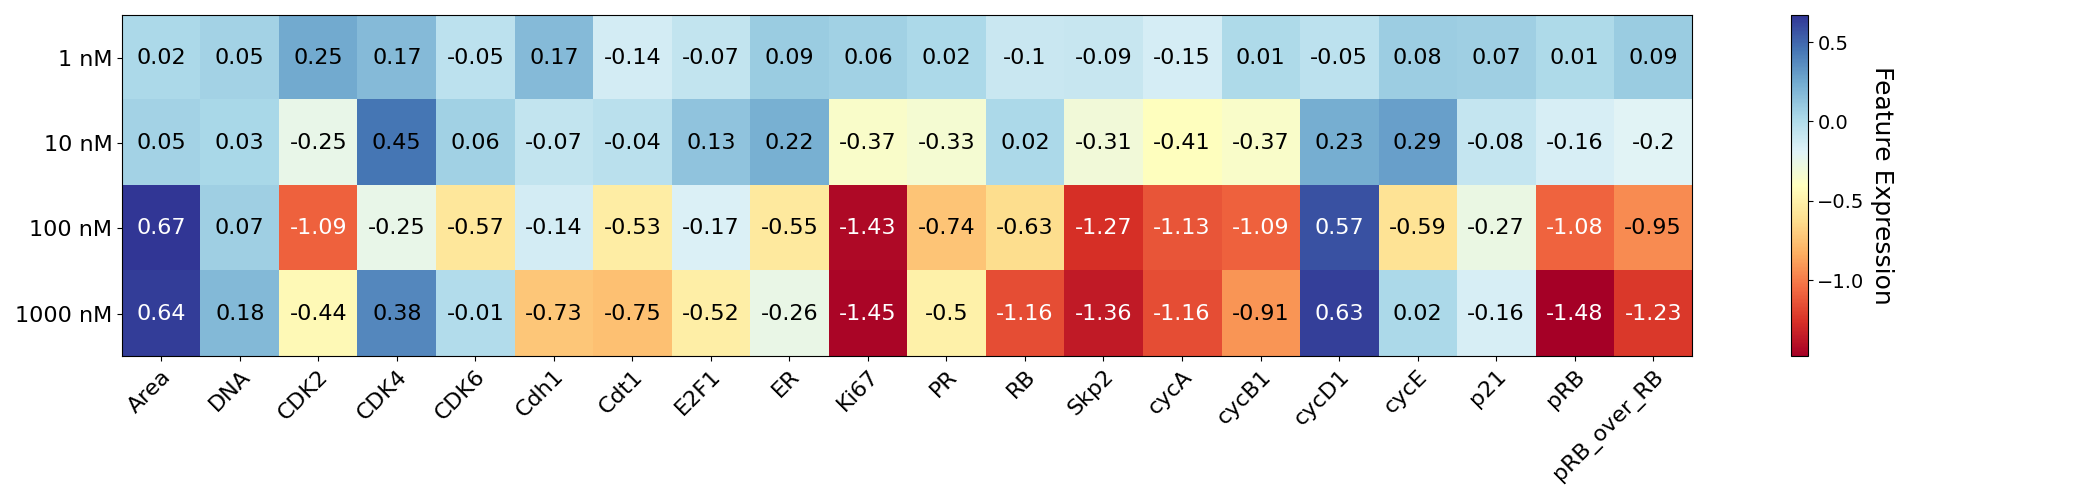

In [62]:
center_shifts_arr = np.array([
    x1_x0_c,
    x10_x0_c, 
    x100_x0_c,
    x1000_x0_c,
    ])

fig, ax = plt.subplots(figsize=(21,5))
im = ax.imshow(center_shifts_arr, aspect='auto', cmap="RdYlBu")

ax.set_xticks(np.arange(len(features)), labels=features, fontsize="16")
ax.set_yticks(np.arange(len(trt_conditions[2:])), labels=[f'{trt_conditions[i]} nM' for i in range(2,len(trt_conditions))], fontsize="16")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(trt_conditions[2:])):
    for j in range(len(features)):
        # text = ax.text(j, i, center_shifts_arr[i, j],
        #                 ha="center", va="center", color="black", fontsize="12")
        if center_shifts_arr[i, j] > 0.5 or center_shifts_arr[i, j] < -1: 
            text = ax.text(j, i, center_shifts_arr[i, j],
                        ha="center", va="center", color="w", fontsize="16")
        else: 
            text = ax.text(j, i, center_shifts_arr[i, j],
                        ha="center", va="center", color="black", fontsize="16")
        
# Add colorbar 
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('Feature Expression', rotation=-90, va="bottom", fontsize="18")

fig.tight_layout()

plt.show()

In [63]:
reordered_features = [
    'Ki67',
    'pRB',
    'Skp2',
    'pRB_over_RB',
    'cycA', 
    'cycB1',
    'RB',
    'CDK2',
    'PR',
    'Cdt1',
    'Cdh1',
    'E2F1',
    'ER',
    'CDK6',
    'p21',
    'cycE',
    'DNA',
    'CDK4',
    'Area', 
    'cycD1',
]

reordered_center_shifts = pd.DataFrame(list(zip(trt_conditions[2:], Ki67, pRB, Skp2, pRB_over_RB, cycA, cycB1, RB, CDK2, PR, Cdt1, Cdh1, E2F1, ER, CDK6, p21, cycE, DNA, CDK4, Area, cycD1)), columns=['Treatment'] + reordered_features)

In [64]:
# establish key for center values 
x0_c_key = {}
x1_c_key = {}
x10_c_key = {}
x100_c_key = {}
x1000_c_key = {}

for i in range(1,len(trt_conditions)):
    for j in range(len(features)): 
        vars()[f'x{trt_conditions[i]}_c_key'][features[j]] = vars()[f'x{trt_conditions[i]}_c'][j][0]

x1_x0_c_re = []
x10_x0_c_re = []
x100_x0_c_re = []
x1000_x0_c_re = []
x10000_x0_c_re = []

for i in range(len(reordered_features)): 
    x1_x0_c_re.append(round(x1_c_key[reordered_features[i]]-x0_c_key[reordered_features[i]], 2))
    x10_x0_c_re.append(round(x10_c_key[reordered_features[i]]-x0_c_key[reordered_features[i]], 2))
    x100_x0_c_re.append(round(x100_c_key[reordered_features[i]]-x0_c_key[reordered_features[i]], 2))
    x1000_x0_c_re.append(round(x1000_c_key[reordered_features[i]]-x0_c_key[reordered_features[i]], 2))

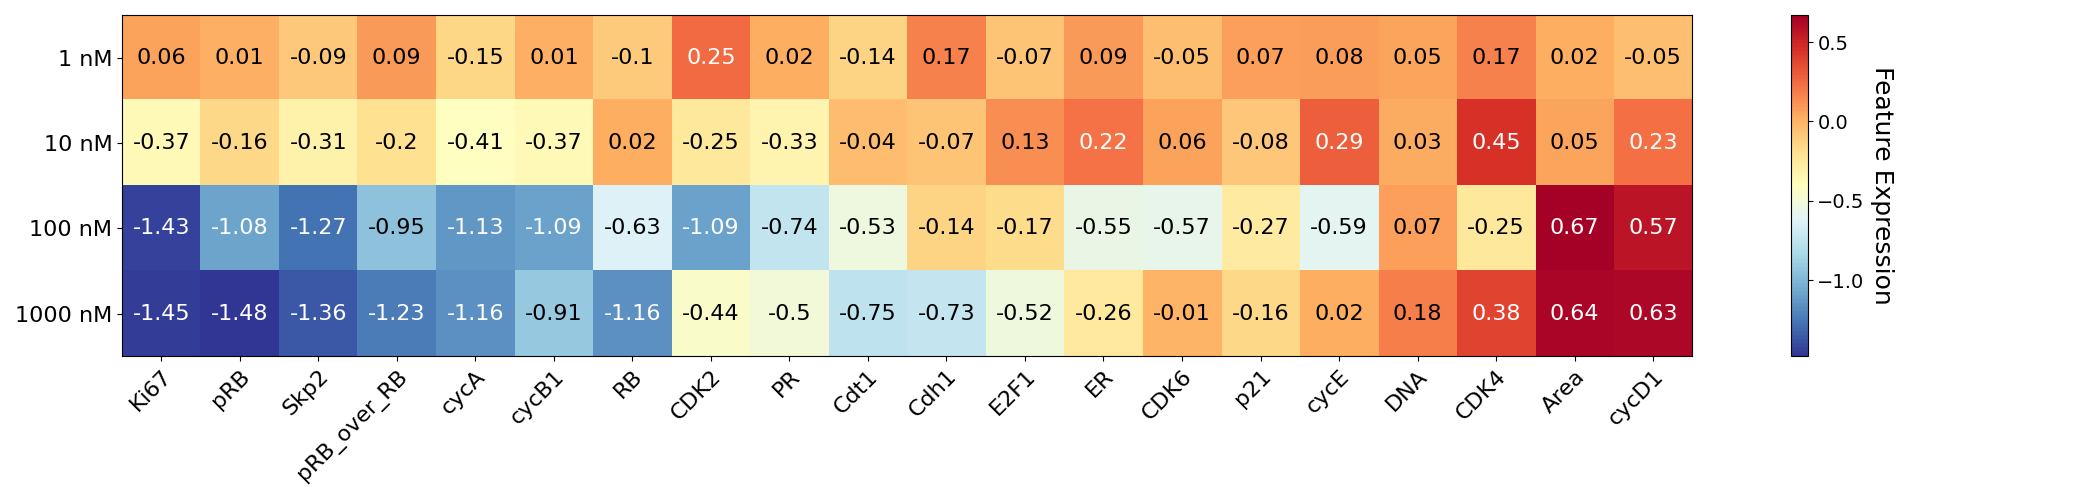

In [65]:
center_shifts_arr_re = np.array([
    x1_x0_c_re,
    x10_x0_c_re, 
    x100_x0_c_re,
    x1000_x0_c_re,
    ])

fig, ax = plt.subplots(figsize=(21,5))
im = ax.imshow(center_shifts_arr_re, aspect='auto', cmap="RdYlBu_r")

ax.set_xticks(np.arange(len(reordered_features)), labels=reordered_features, fontsize="16")
ax.set_yticks(np.arange(len(trt_conditions[2:])), labels=[f'{trt_conditions[i]} nM' for i in range(2,len(trt_conditions))], fontsize="16")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(trt_conditions[2:])):
    for j in range(len(reordered_features)):
        # text = ax.text(j, i, center_shifts_arr[i, j],
        #                 ha="center", va="center", color="black", fontsize="12")
        if center_shifts_arr_re[i, j] > 0.2 or center_shifts_arr_re[i, j] < -1.05: 
            text = ax.text(j, i, center_shifts_arr_re[i, j],
                        ha="center", va="center", color="w", fontsize="16")
        else: 
            text = ax.text(j, i, center_shifts_arr_re[i, j],
                        ha="center", va="center", color="black", fontsize="16")
        
# Add colorbar 
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('Feature Expression', rotation=-90, va="bottom", fontsize="18")

fig.tight_layout()

plt.show()

plt.savefig(f"figures/center_shifts.pdf", format="pdf", bbox_inches="tight")


In [66]:
# calculate centers projected to 3D V

# initialize vars for 3d center coords 
for i in range(1, len(trt_conditions)): 
    vars()[f"x_x{trt_conditions[i]}"] = 0
    vars()[f"y_x{trt_conditions[i]}"] = 0
    vars()[f"z_x{trt_conditions[i]}"] = 0

# project centers to V 
for i in range(1, len(trt_conditions)):
    x_c = vars()[f"x{trt_conditions[i]}_c"]
    x_r = vars()[f"x{trt_conditions[i]}_r"]
    vars()[f"x{trt_conditions[i]}_c_proj"] = Proj(x_c, x_r, x_c, V) # V b/c global V 

    # find average x, y, z coords across all features 
    for j in range(len(features)): 
        vars()[f"x_x{trt_conditions[i]}"] += vars()[f"x{trt_conditions[i]}_c_proj"][j][0]
        vars()[f"y_x{trt_conditions[i]}"] += vars()[f"x{trt_conditions[i]}_c_proj"][j][1]
        vars()[f"z_x{trt_conditions[i]}"] += vars()[f"x{trt_conditions[i]}_c_proj"][j][2]
    vars()[f"x_x{trt_conditions[i]}"] /= len(features)
    vars()[f"y_x{trt_conditions[i]}"] /= len(features)
    vars()[f"z_x{trt_conditions[i]}"] /= len(features)

# 3d centers
x0_c_proj_3d = [x_x0, y_x0, z_x0]
x1_c_proj_3d = [x_x1, y_x1, z_x1]
x10_c_proj_3d = [x_x10, y_x10, z_x10]
x100_c_proj_3d = [x_x100, y_x100, z_x100]
x1000_c_proj_3d = [x_x1000, y_x1000, z_x1000]

In [67]:
# add centers to projections 

# intialize vars for updated 3d coords 
for i in range(1, len(trt_conditions)): 
    vars()[f'x_x{trt_conditions[i]}_c'] = []
    vars()[f'y_x{trt_conditions[i]}_c'] = []
    vars()[f'z_x{trt_conditions[i]}_c'] = []

# add 3d centers to prev 3d projection coords 
for i in range(1, len(trt_conditions)): 
    proj = vars()[f'x{trt_conditions[i]}_proj']
    for j in range(len(proj)):
        vars()[f'x_x{trt_conditions[i]}_c'].append(proj[j][0] + vars()[f'x_x{trt_conditions[i]}'])
        vars()[f'y_x{trt_conditions[i]}_c'].append(proj[j][1] + vars()[f'y_x{trt_conditions[i]}'])
        vars()[f'z_x{trt_conditions[i]}_c'].append(proj[j][2] + vars()[f'z_x{trt_conditions[i]}'])

x_spca = x.copy()
x_spca['SPCA_1'] = x_x0_c + x_x1_c + x_x10_c + x_x100_c + x_x1000_c 
x_spca['SPCA_2'] = y_x0_c + y_x1_c + y_x10_c + y_x100_c + y_x1000_c 
x_spca['SPCA_3'] = z_x0_c + z_x1_c + z_x10_c + z_x100_c + z_x1000_c 
x_spca['metadata_well'] = metadata_well
x_spca['phase'] = phase

x_spca

AreaShape_Area  Intensity_IntegratedIntensity_DNA  \
0           -0.926708                          -0.458879   
1           -1.245438                          -0.453973   
2           -0.428693                          -0.524069   
3            0.773184                           1.365078   
4           -0.415413                          -0.513221   
...               ...                                ...   
64497       -1.411443                          -1.082969   
64498        0.507576                           1.177778   
64499       -0.561497                          -0.439588   
64500       -0.335730                          -0.416980   
64501        0.122444                          -0.613439   

       Intensity_MedianIntensity_CDK2  Intensity_MedianIntensity_CDK4  \
0                            1.322612                        0.976904   
1                            1.380743                        1.118071   
2                           -1.129765                       -1.111307   
3                            0.991996                       -0.003277   
4                            0.339845                       -0.884906   
...                               ...                             ...   
64497                       -0.837296                       -0.987452   
64498                        0.356194                       -0.490703   
64499                        0.278081                        2.664252   
64500                       -0.174246                       -0.227014   
64501                       -0.995338                       -0.996775   

       Intensity_MedianIntensity_CDK6  Intensity_MedianIntensity_Cdh1  \
0                            0.062764                        0.145205   
1                            0.339295                        0.705600   
2                           -0.609492                       -0.881059   
3                           -0.104108                        0.536806   
4                           -0.804970                       -0.016837   
...                               ...                             ...   
64497                       -0.249525                       -0.168751   
64498                        0.224868                       -0.185630   
64499                        0.582451                        0.286992   
64500                       -0.015904                        0.070936   
64501                        0.038925                       -0.266651   

       Intensity_MedianIntensity_Cdt1  Intensity_MedianIntensity_E2F1  \
0                            2.516578                        0.407586   
1                            0.356098                       -0.268247   
2                           -0.406767                       -0.756349   
3                           -0.377650                       -0.503954   
4                           -0.170920                       -0.630151   
...                               ...                             ...   
64497                       -0.245168                       -0.550887   
64498                       -0.415502                       -0.416346   
64499                       -0.127244                        0.002921   
64500                       -0.581469                        0.815381   
64501                       -0.572734                       -0.614507   

       Intensity_MedianIntensity_ER  Intensity_MedianIntensity_Ki67  ...  \
0                          0.319061                        0.171325  ...   
1                          1.292693                        0.778215  ...   
2                         -1.394264                       -0.090779  ...   
3                          0.457196                        3.020565  ...   
4                         -0.713613                        1.364434  ...   
...                             ...                             ...  ...   
64497                      0.039448                       -0.447140  ...   
64498                      1.000826            

In [68]:
x_spca.to_csv("data/T47D_SPCA.csv", index=False)

## Plot Hyperspheres

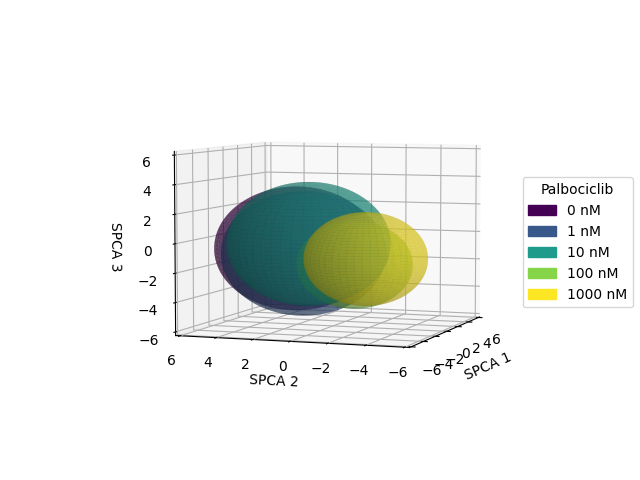

No such comm: 4c3cc2a142e54d55b0f0d46cafb04ab2


In [69]:
# all treatment conditions
%matplotlib widget

# Define the center and radius values for 2 spheres
centers = np.array([x0_c_proj_3d, x1_c_proj_3d, x10_c_proj_3d, x100_c_proj_3d, x1000_c_proj_3d])
radii = np.array([x0_r, x1_r, x10_r, x100_r, x1000_r])

# Create a 3D scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the spheres
for i, (center, radius) in enumerate(zip(centers, radii)):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    xi = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    yi = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    zi = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(xi, yi, zi, color=trt_colors[i], alpha=0.5)

    # Generate random points around each sphere
    num_points = 50
    phi = np.random.uniform(0, 2 * np.pi, num_points)
    theta = np.random.uniform(0, np.pi, num_points)
    r = np.random.uniform(0, radius, num_points)

# Set axis labels
ax.set_xlabel('SPCA 1')
ax.set_ylabel('SPCA 2')
ax.set_zlabel('SPCA 3')

plt.xlim(-6, 6)
plt.ylim(-6, 6)
ax.set_zlim(-6, 6)

# Add a legend
color_0 = mpatches.Patch(color=trt_colors[0], label='0 nM')
color_1 = mpatches.Patch(color=trt_colors[1], label='1 nM')
color_10 = mpatches.Patch(color=trt_colors[2], label='10 nM')
color_100 = mpatches.Patch(color=trt_colors[3], label='100 nM')
color_1000 = mpatches.Patch(color=trt_colors[4], label='1000 nM')
ax.legend(bbox_to_anchor=(1.4, 0.5),
            loc="right",
            borderaxespad=2.,
            title="Palbociclib",
            handles=[color_0, color_1, color_10, color_100, color_1000])

ax.view_init(5,200)


# Show the plot
plt.show()

plt.savefig("figures/spca_spheres.pdf", format="pdf", bbox_inches="tight")


## Plot Projections

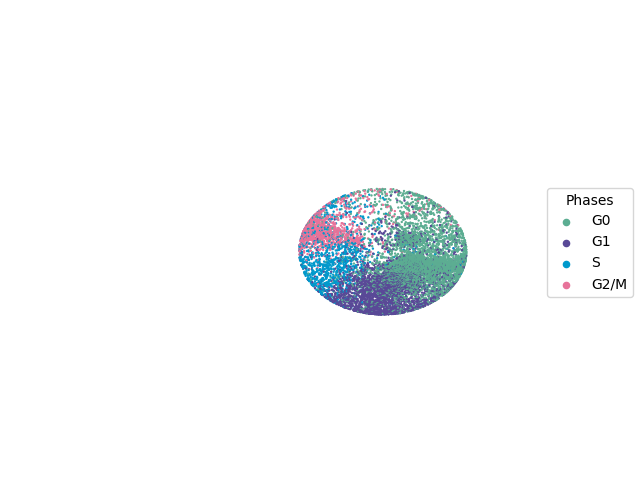

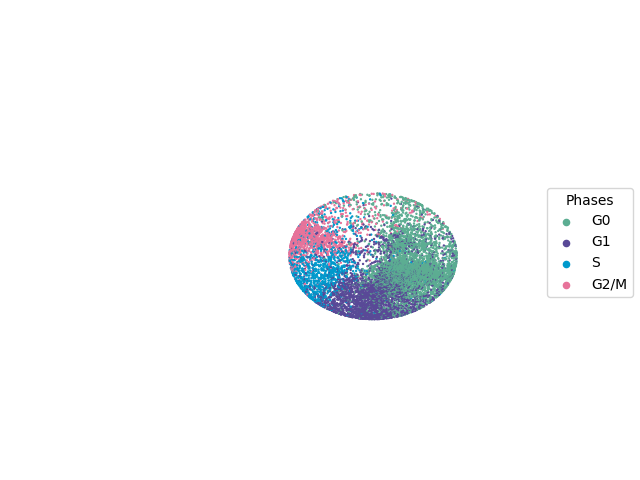

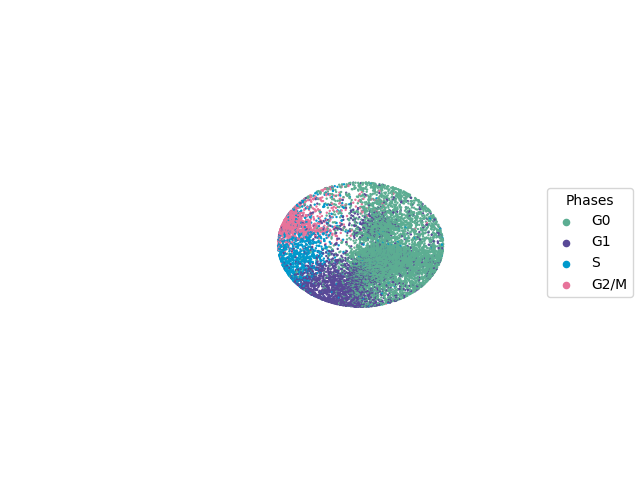

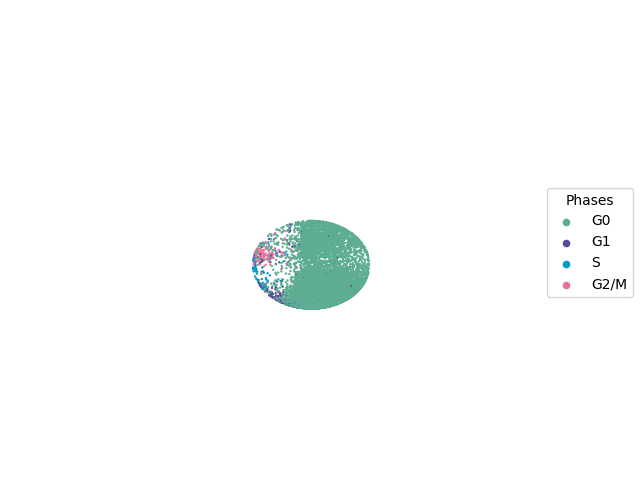

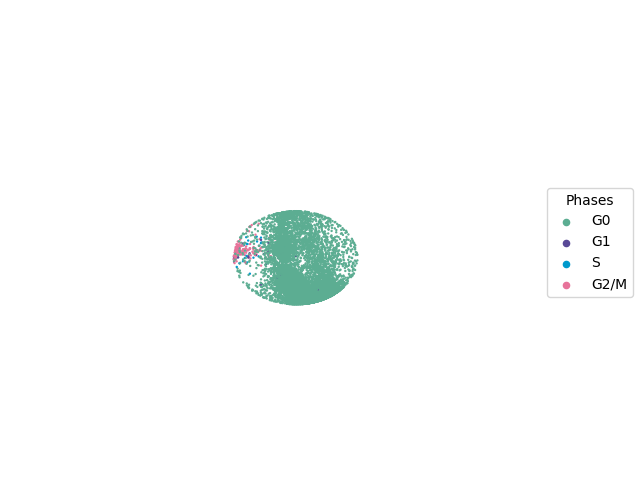

In [70]:
%matplotlib widget

for i in range(1, len(trt_conditions)):
    # Create a 3D scatterplot
    fig = plt.figure()
    ax=fig.add_subplot(111,projection='3d')

    phase_colors = vars()[f"x{trt_conditions[i]}_phase_colors"]
    phases = vars()[f"x{trt_conditions[i]}_phase"]

    ax.scatter3D(x_spca['SPCA_1'][metadata_well == int(trt_conditions[i])], 
                 x_spca['SPCA_2'][metadata_well == int(trt_conditions[i])], 
                 x_spca['SPCA_3'][metadata_well == int(trt_conditions[i])], 
                 alpha=1, 
                 c=phase_colors, 
                 s=0.5)
    

    ax.set_xlabel('SPCA 1')
    ax.set_ylabel('SPCA 2')
    ax.set_zlabel('SPCA 3')

    plt.grid(False)
    plt.axis('off')
    
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    ax.set_zlim(-6, 6)

    plt.scatter([], [], c='#5CAD92', s=20, label="G0")
    plt.scatter([], [], c='#594997', s=20, label="G1")
    plt.scatter([], [], c='#0099CC', s=20, label="S")
    plt.scatter([], [], c='#E7739A', s=20, label="G2/M")
    plt.legend(bbox_to_anchor=(1.4, 0.5),
            loc="right",
            borderaxespad=2.,
            scatterpoints=1, 
            title="Phases")
    
    ax.view_init(5,340)

    plt.show()

    plt.savefig(f"figures/phases_{trt_conditions[i]}.pdf", format="pdf", bbox_inches="tight")
    

In [71]:
feature_cols

Index(['AreaShape_Area', 'Intensity_IntegratedIntensity_DNA',
       'Intensity_MedianIntensity_CDK2', 'Intensity_MedianIntensity_CDK4',
       'Intensity_MedianIntensity_CDK6', 'Intensity_MedianIntensity_Cdh1',
       'Intensity_MedianIntensity_Cdt1', 'Intensity_MedianIntensity_E2F1',
       'Intensity_MedianIntensity_ER', 'Intensity_MedianIntensity_Ki67',
       'Intensity_MedianIntensity_PR', 'Intensity_MedianIntensity_RB',
       'Intensity_MedianIntensity_Skp2', 'Intensity_MedianIntensity_cycA',
       'Intensity_MedianIntensity_cycB1', 'Intensity_MedianIntensity_cycD1',
       'Intensity_MedianIntensity_cycE', 'Intensity_MedianIntensity_p21',
       'Intensity_MedianIntensity_pRB', 'pRB_over_RB'],
      dtype='object')

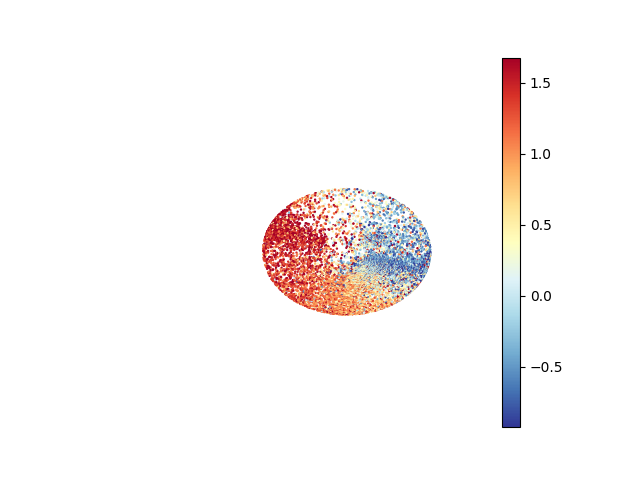

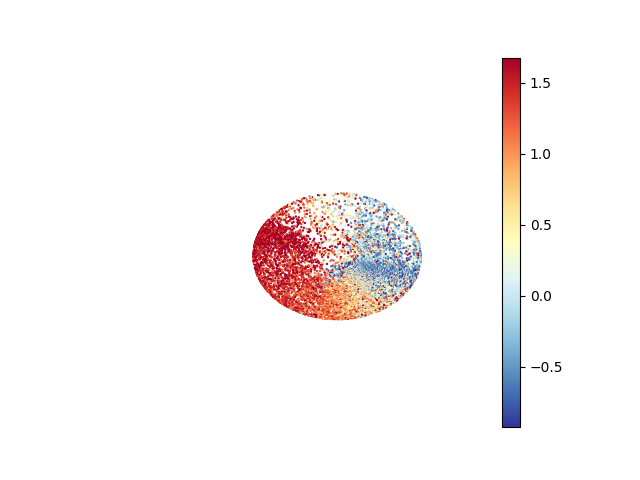

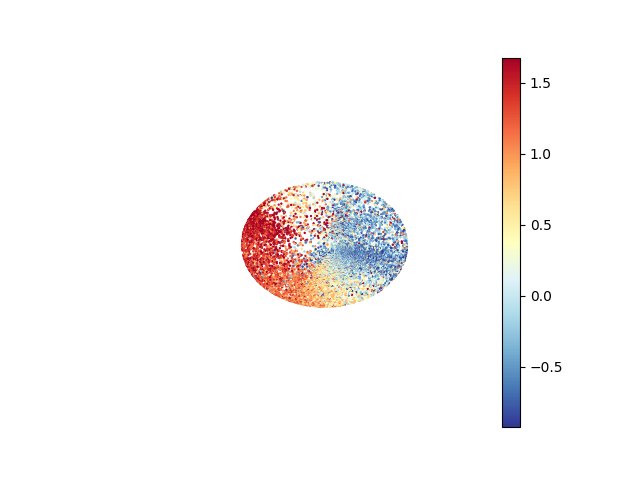

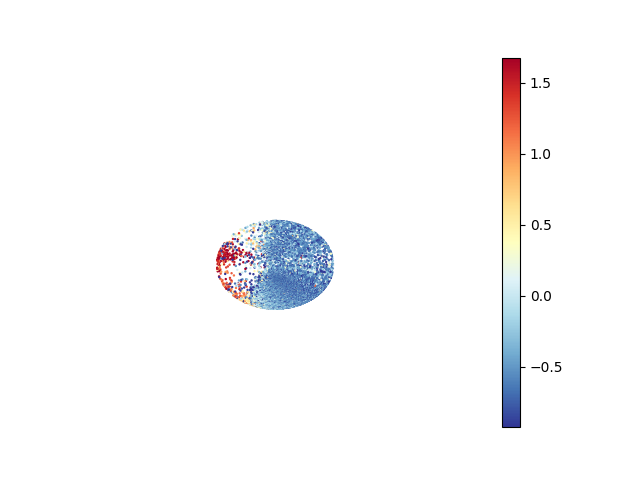

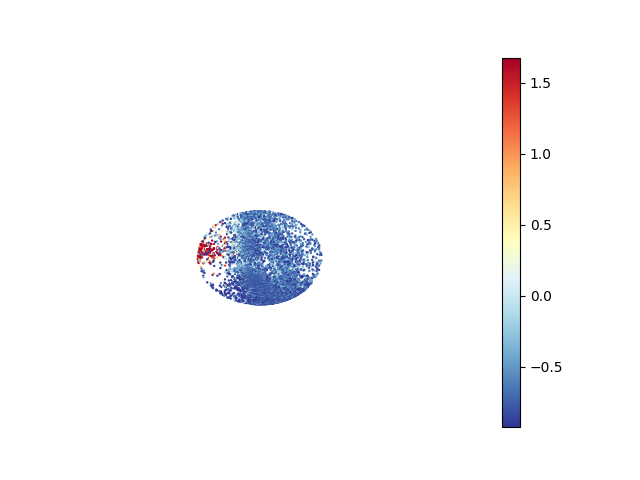

In [72]:
%matplotlib widget

feature = 'pRB_over_RB'

for i in range(1,len(trt_conditions)):
    fig = plt.figure()
    ax=fig.add_subplot(111,projection='3d')

    feature_exp = vars()[f'x{trt_conditions[i]}'][feature].to_numpy()
    total_feature = x_spca[feature].to_numpy()

    sc = ax.scatter3D(x_spca['SPCA_1'][metadata_well == int(trt_conditions[i])], 
                    x_spca['SPCA_2'][metadata_well == int(trt_conditions[i])], 
                    x_spca['SPCA_3'][metadata_well == int(trt_conditions[i])], 
                    alpha=1, 
                    c=feature_exp, 
                    vmin=np.percentile(total_feature, 5),
                    vmax=np.percentile(total_feature, 95),
                    cmap='RdYlBu_r',
                    s=0.5)

    # Set axis labels
    ax.set_xlabel('SPCA 1')
    ax.set_ylabel('SPCA 2')
    ax.set_zlabel('SPCA 3')

    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    ax.set_zlim(-6, 6)

    ax.view_init(5,340)

    plt.grid(False)
    plt.axis('off')
    
    # Add colorbar 
    plt.colorbar(sc)
    
    plt.savefig(f"figures/feature_exp/{feature}_{trt_conditions[i]}.pdf", format="pdf", bbox_inches="tight")
        

## G0 Cells 

In [73]:
g0_0 = x_spca[x_spca['metadata_well'] == 0]
g0_0 = g0_0[g0_0['phase'] == 'G0']

g0_1 = x_spca[x_spca['metadata_well'] == 1]
g0_1 = g0_1[g0_1['phase'] == 'G0']

g0_10 = x_spca[x_spca['metadata_well'] == 10]
g0_10 = g0_10[g0_10['phase'] == 'G0']

g0_100 = x_spca[x_spca['metadata_well'] == 100]
g0_100 = g0_100[g0_100['phase'] == 'G0']

g0_1000 = x_spca[x_spca['metadata_well'] == 1000]
g0_1000 = g0_1000[g0_1000['phase'] == 'G0']

In [74]:
cols = g0_0.columns

for i in range(len(features)): 
    vars()[f'{features[i]}_g0'] = [
        round(g0_0[cols[i]].mean(), 2),
        round(g0_1[cols[i]].mean(), 2),
        round(g0_10[cols[i]].mean(), 2),
        round(g0_100[cols[i]].mean(), 2),
        round(g0_1000[cols[i]].mean(), 2),
        ]

In [75]:
# same order as reordered features for center shifts 
reordered_g0 = pd.DataFrame(list(zip(trt_conditions[1:], Ki67_g0, pRB_g0, Skp2_g0, pRB_over_RB_g0, cycA_g0, cycB1_g0, RB_g0, CDK2_g0, PR_g0, Cdt1_g0, Cdh1_g0, E2F1_g0, ER_g0, CDK6_g0, p21_g0, cycE_g0, DNA_g0, CDK4_g0, Area_g0, cycD1_g0)), columns=['Treatment'] + reordered_features)
reordered_g0_arr = reordered_g0.drop(['Treatment'],axis=1).to_numpy()

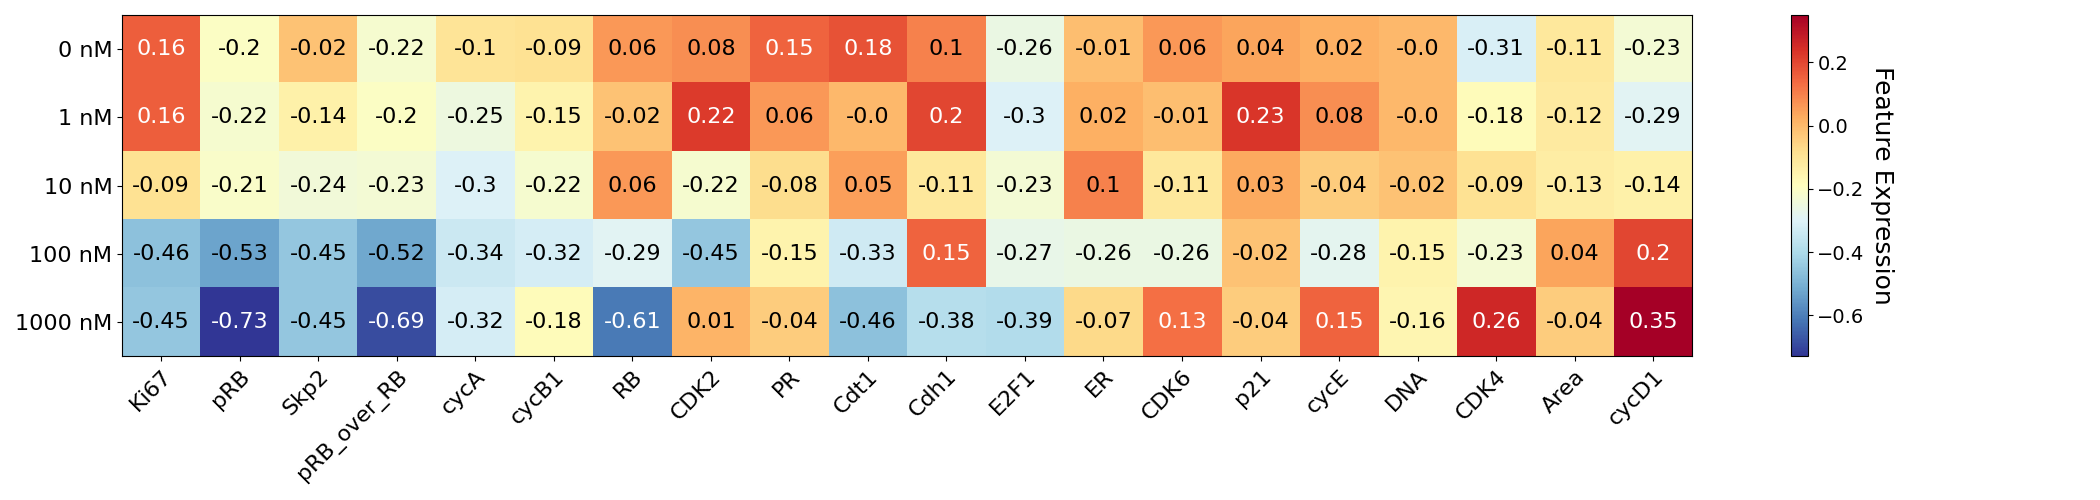

In [76]:
fig, ax = plt.subplots(figsize=(21,5))
im = ax.imshow(reordered_g0_arr, aspect='auto', cmap="RdYlBu_r")

ax.set_xticks(np.arange(len(reordered_features)), labels=reordered_features, fontsize="16")
ax.set_yticks(np.arange(len(trt_conditions[1:])), labels=[f'{trt_conditions[i]} nM' for i in range(1,len(trt_conditions))], fontsize="16")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(trt_conditions)-1):
    for j in range(len(reordered_features)):
        if reordered_g0_arr[i, j] > 0.1 or reordered_g0_arr[i, j] < -0.6: 
            text = ax.text(j, i, reordered_g0_arr[i, j],
                        ha="center", va="center", color="w", fontsize="16")
        else: 
            text = ax.text(j, i, reordered_g0_arr[i, j],
                        ha="center", va="center", color="black", fontsize="16")
        
# Add colorbar 
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('Feature Expression', rotation=-90, va="bottom", fontsize="18")

fig.tight_layout()

plt.show()

plt.savefig(f"figures/g0.pdf", format="pdf", bbox_inches="tight")

## Feature Means

In [77]:
for i in range(len(features)): 
    vars()[f'{features[i]}_mean'] = [
        round(x1[cols[i]].mean()-x0[cols[i]].mean(), 2), 
        round(x10[cols[i]].mean()-x0[cols[i]].mean(), 2), 
        round(x100[cols[i]].mean()-x0[cols[i]].mean(), 2), 
        round(x1000[cols[i]].mean()-x0[cols[i]].mean(), 2), 
        ]

In [78]:
# same order as reordered features for center shifts 
reordered_mean = pd.DataFrame(list(zip(trt_conditions[2:], Ki67_mean, pRB_mean, Skp2_mean, pRB_over_RB_mean, cycA_mean, cycB1_mean, RB_mean, CDK2_mean, PR_mean, Cdt1_mean, Cdh1_mean, E2F1_mean, ER_mean, CDK6_mean, p21_mean, cycE_mean, DNA_mean, CDK4_mean, Area_mean, cycD1_mean)), columns=['Treatment'] + reordered_features)
reordered_mean_arr = reordered_mean.drop(['Treatment'],axis=1).to_numpy()

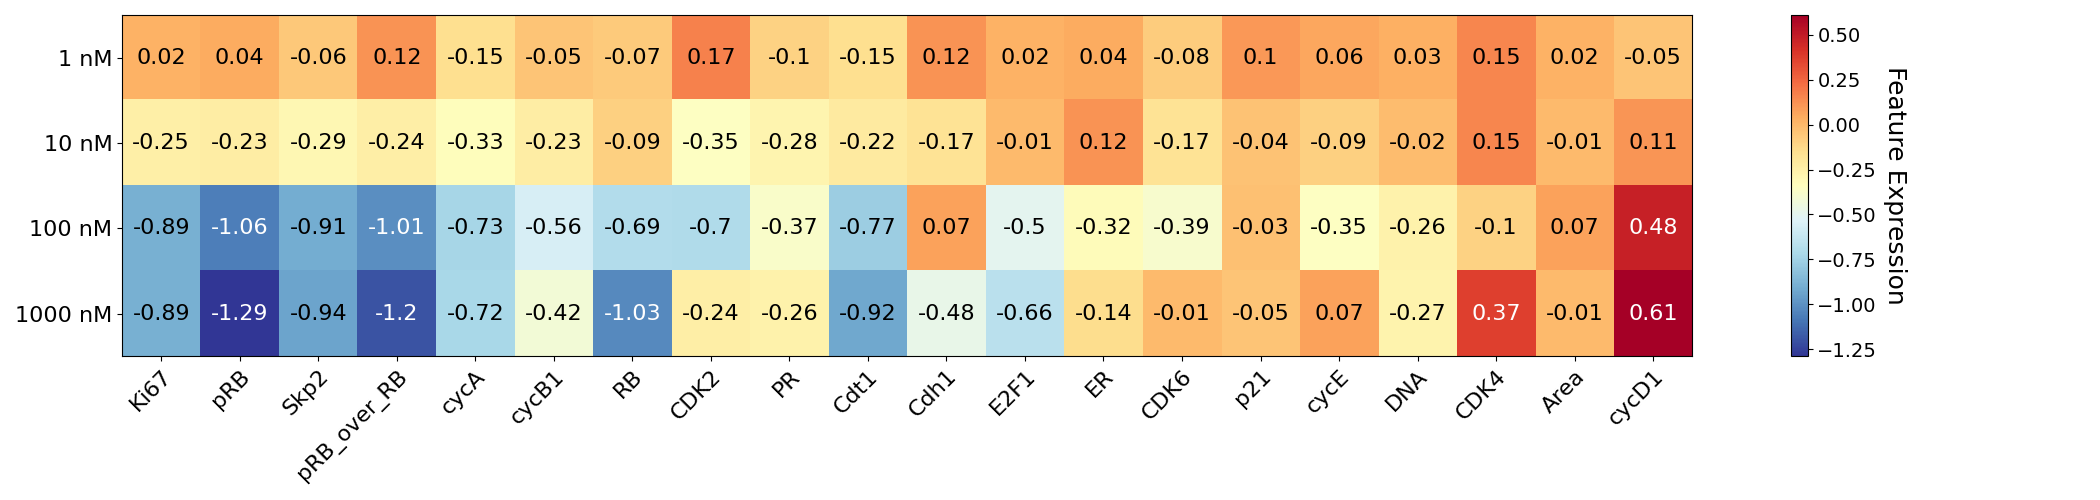

In [79]:
fig, ax = plt.subplots(figsize=(21,5))
im = ax.imshow(reordered_mean_arr, aspect='auto', cmap="RdYlBu_r")

ax.set_xticks(np.arange(len(reordered_features)), labels=reordered_features, fontsize="16")
ax.set_yticks(np.arange(len(trt_conditions[2:])), labels=[f'{trt_conditions[i]} nM' for i in range(2,len(trt_conditions))], fontsize="16")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(trt_conditions)-2):
    for j in range(len(reordered_features)):
        if reordered_mean_arr[i, j] > 0.25 or reordered_mean_arr[i, j] < -0.95: 
            text = ax.text(j, i, reordered_mean_arr[i, j],
                        ha="center", va="center", color="w", fontsize="16")
        else: 
            text = ax.text(j, i, reordered_mean_arr[i, j],
                        ha="center", va="center", color="black", fontsize="16")
        
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('Feature Expression', rotation=-90, va="bottom", fontsize="18")

fig.tight_layout()

plt.show()

plt.savefig(f"figures/feature_mean_shifts.pdf", format="pdf", bbox_inches="tight")

/var/folders/9p/p4yl9s1d43b3by_cf1ct1pl80000gn/T/ipykernel_38895/4257443635.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


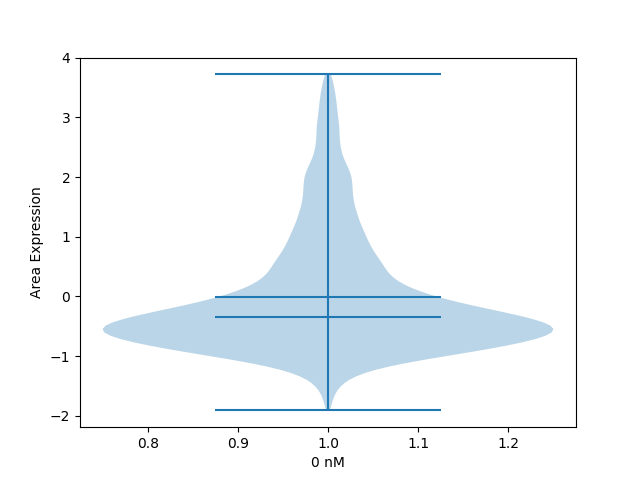

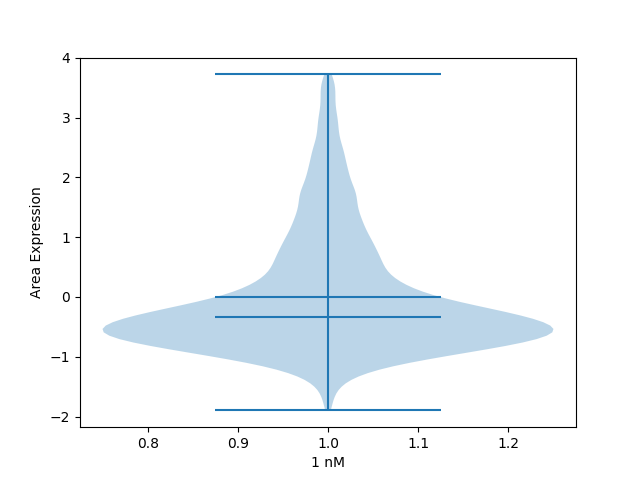

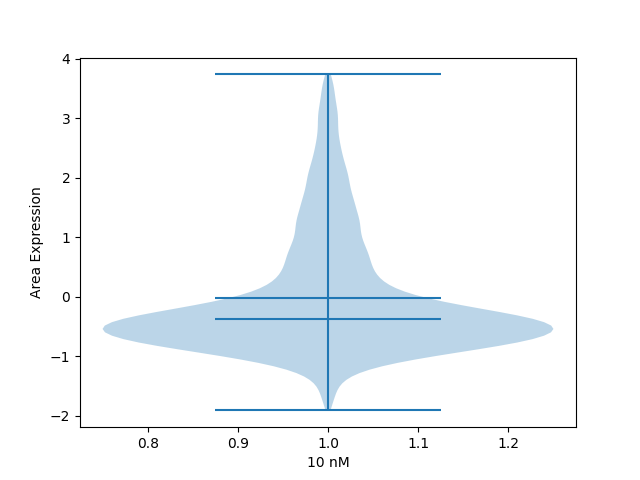

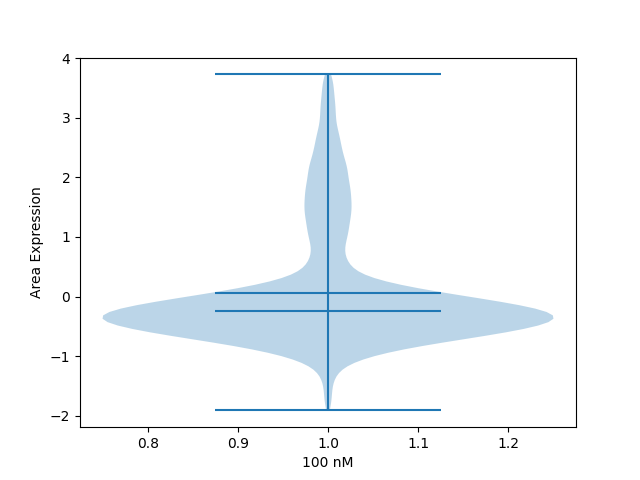

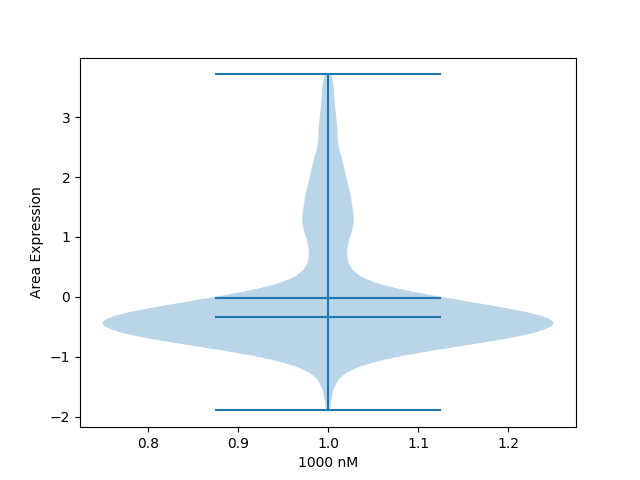

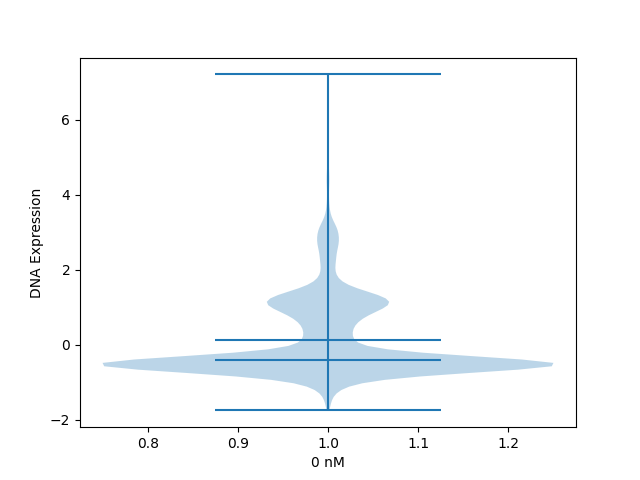

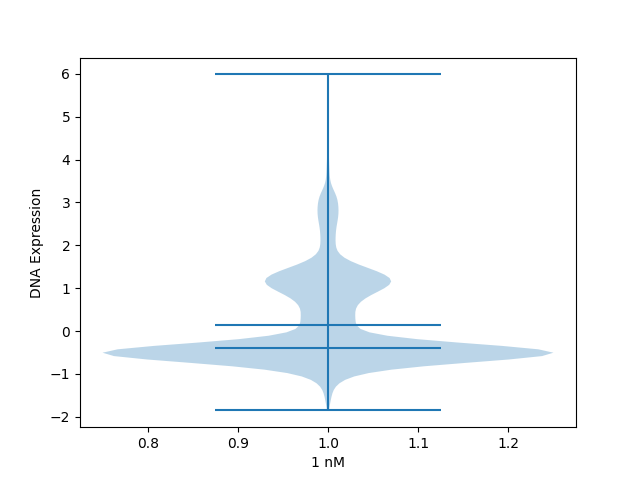

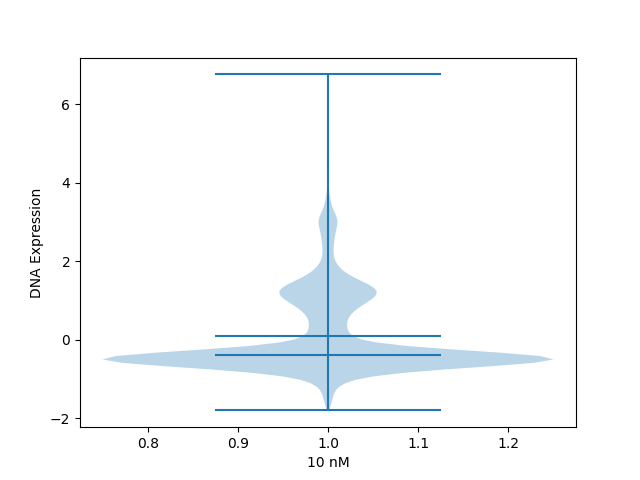

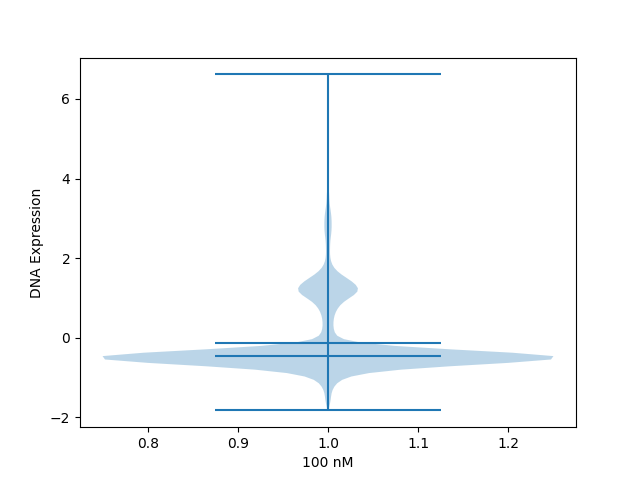

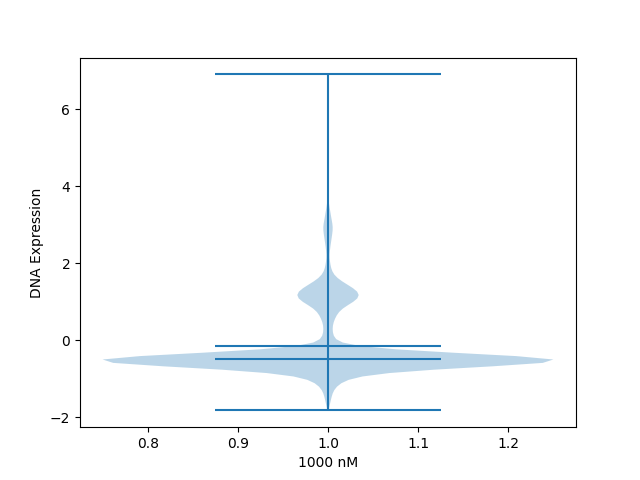

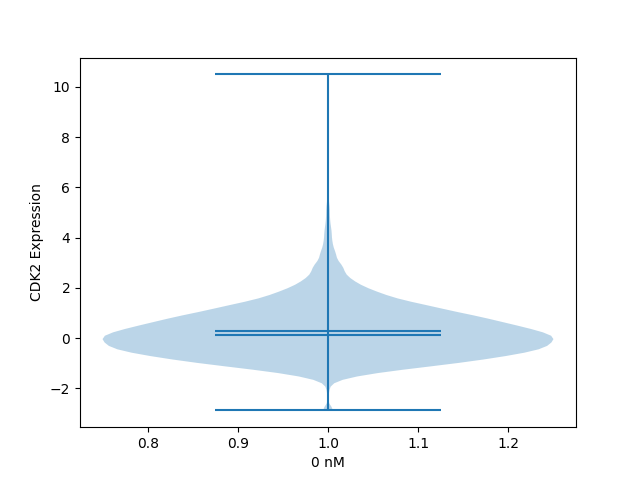

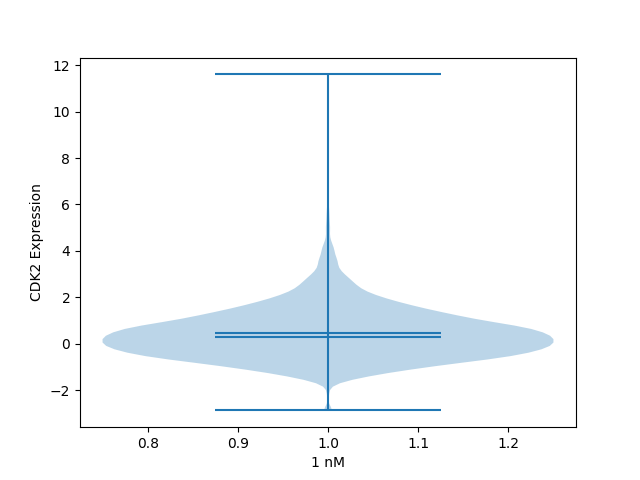

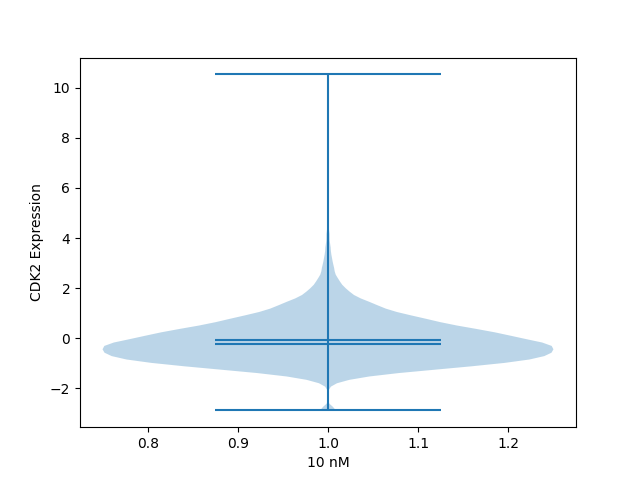

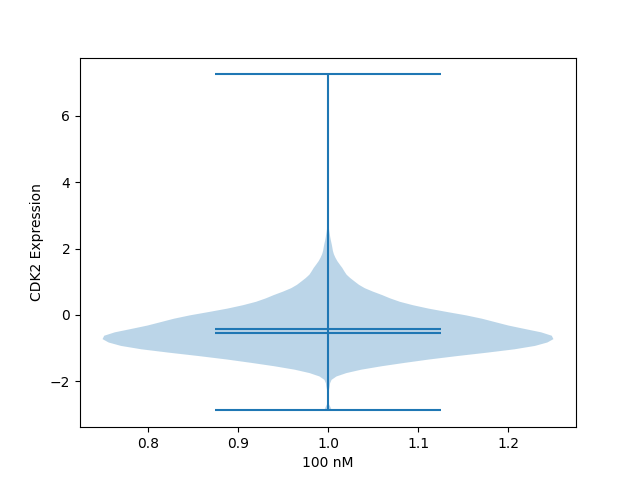

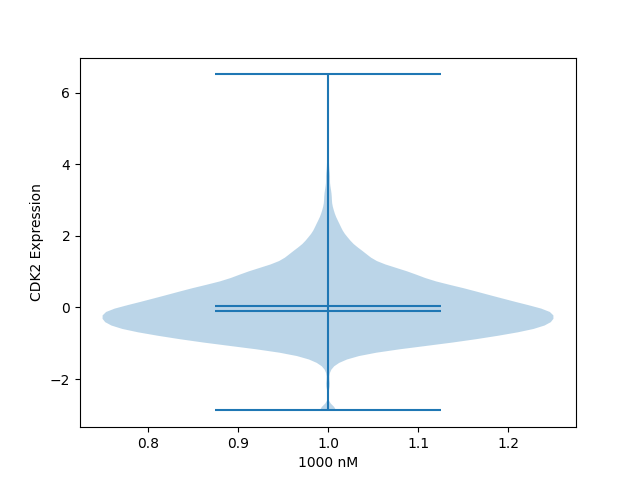

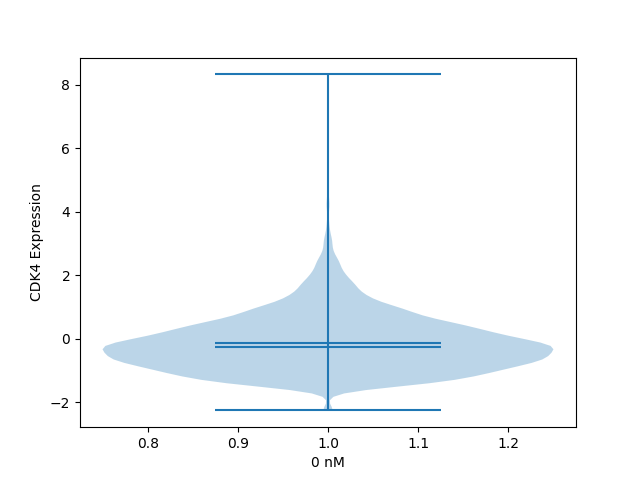

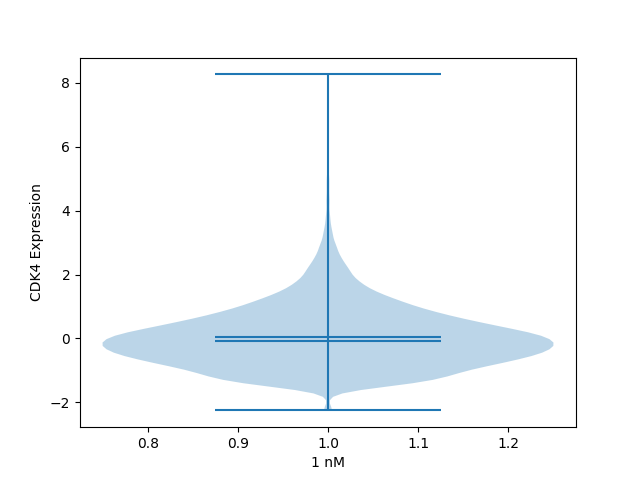

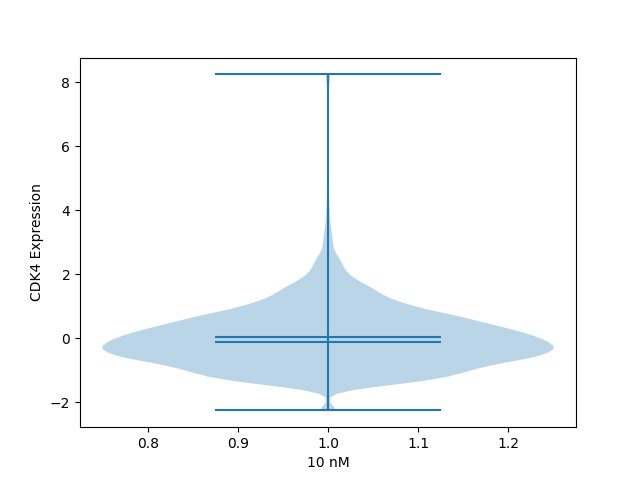

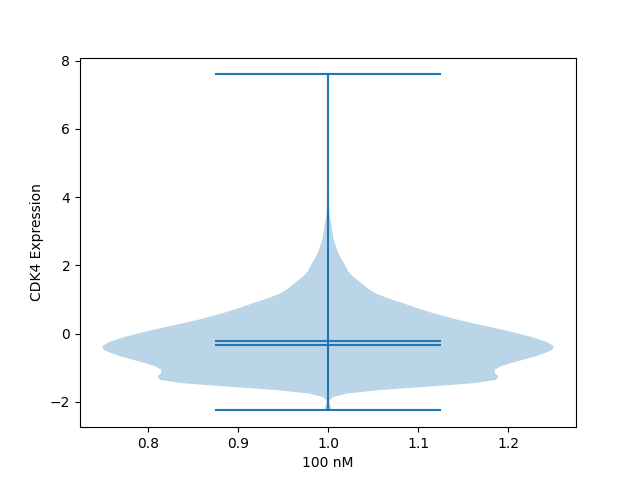

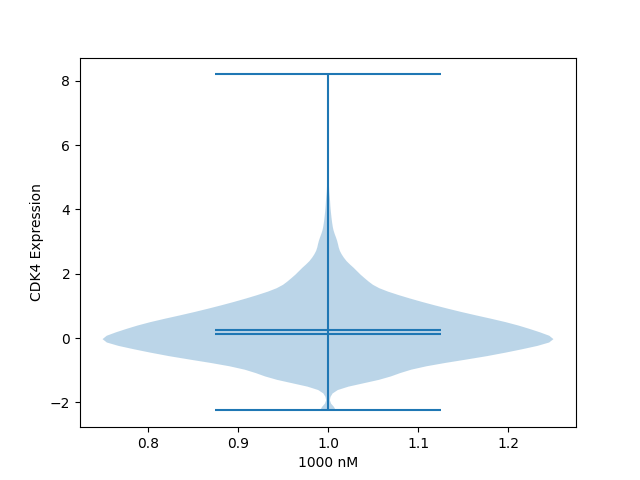

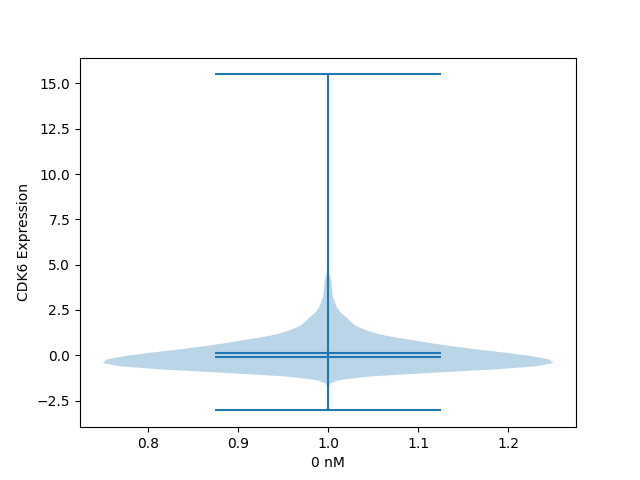

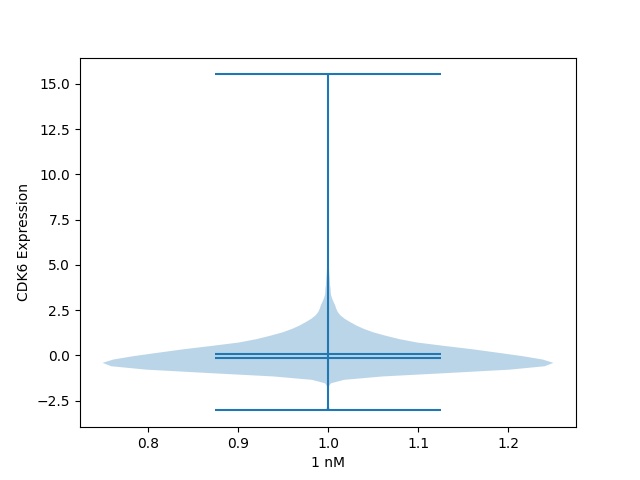

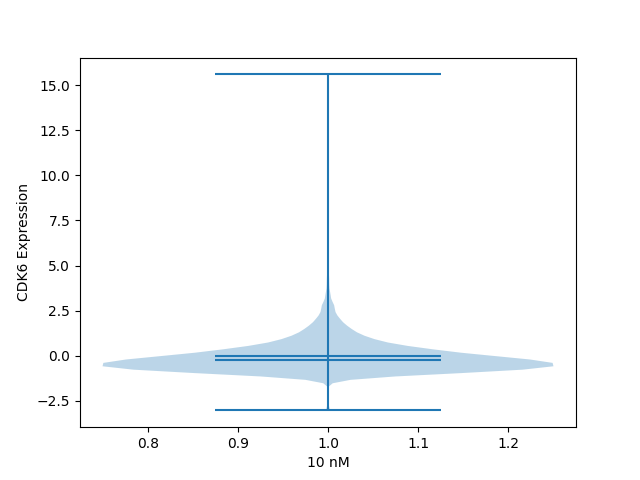

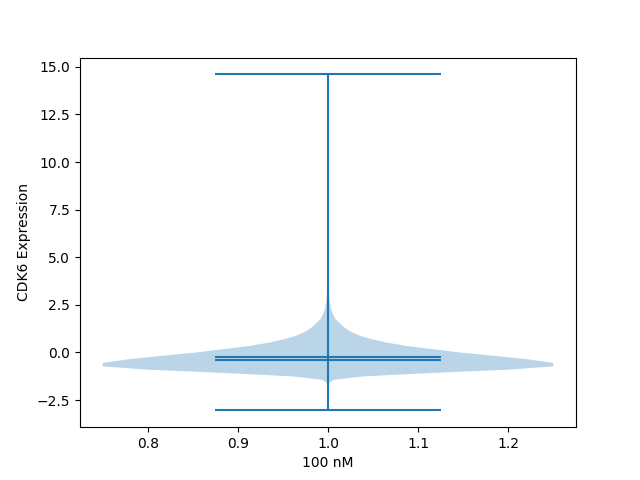

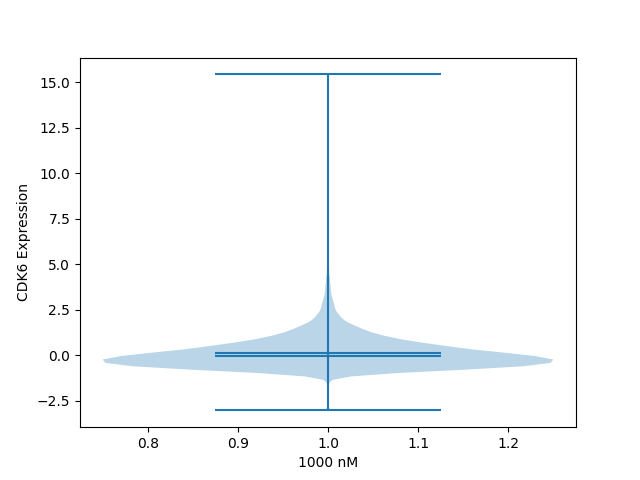

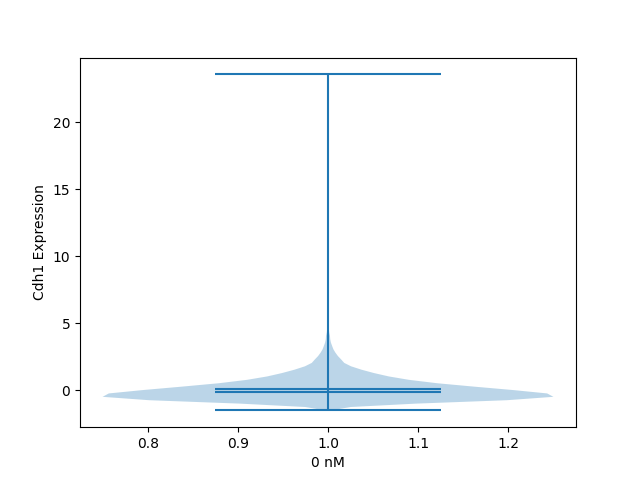

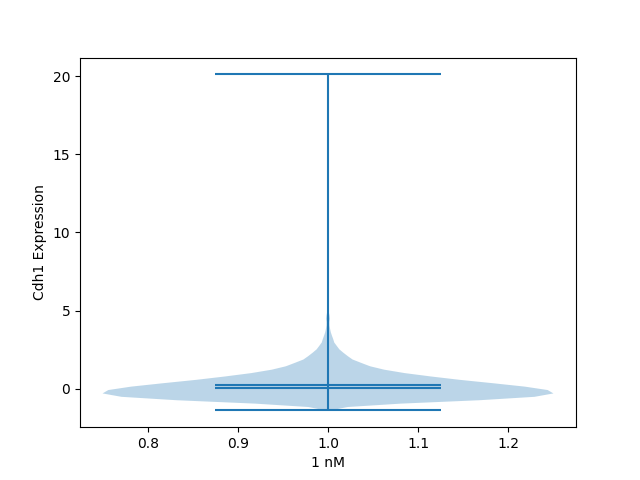

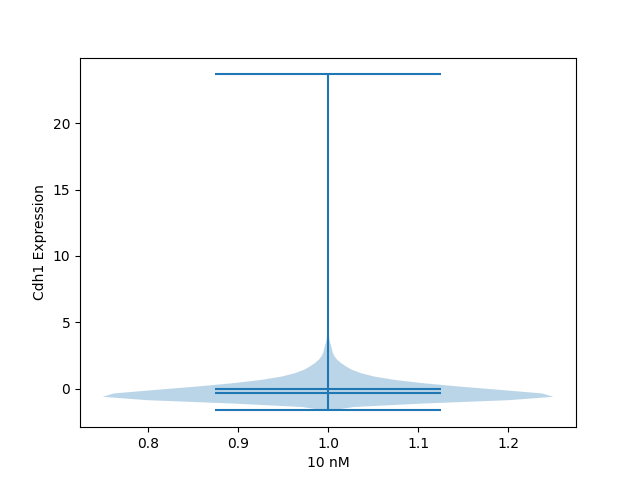

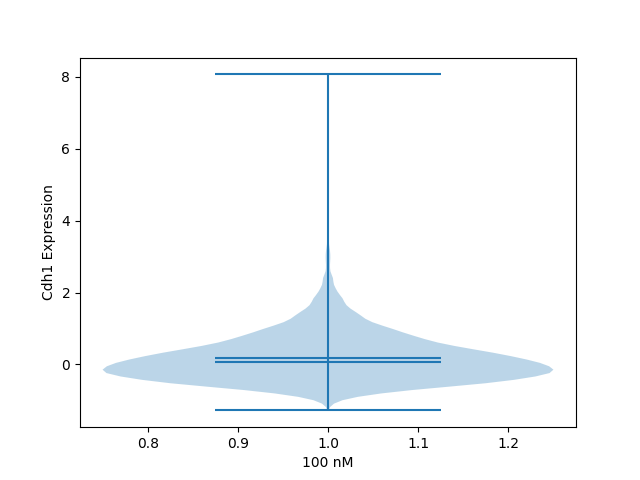

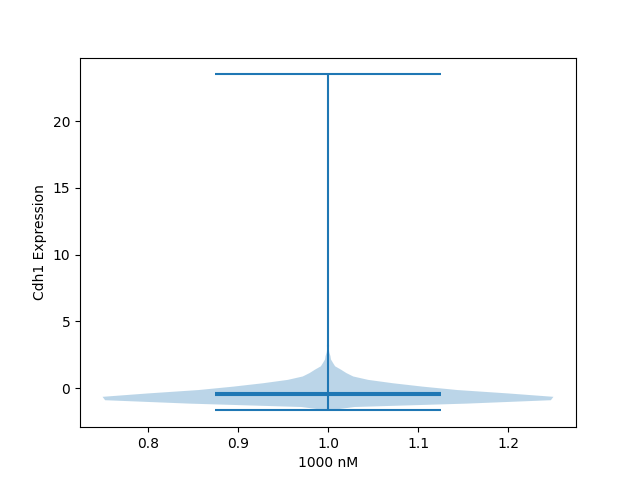

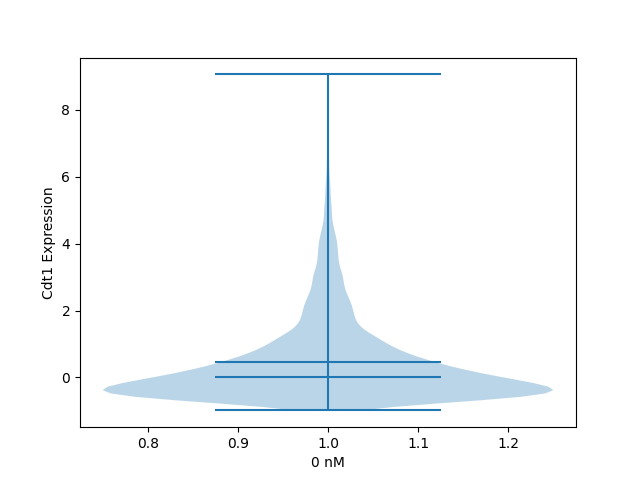

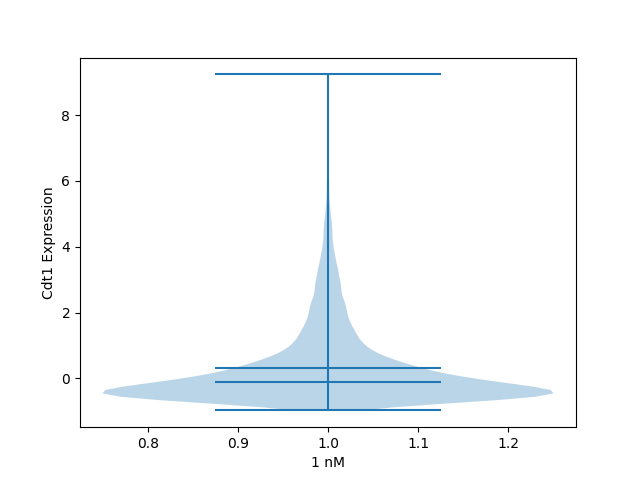

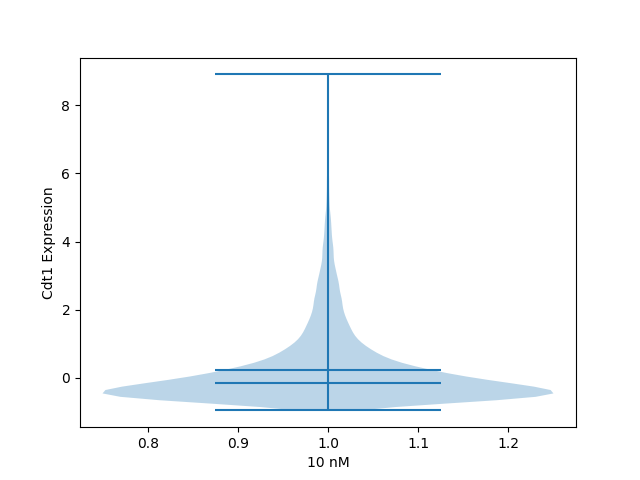

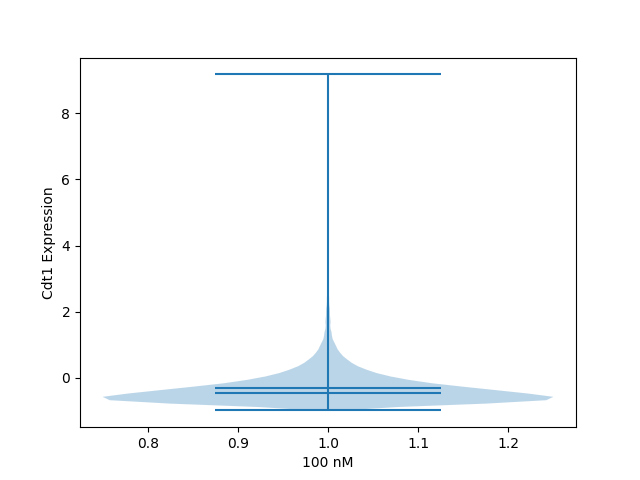

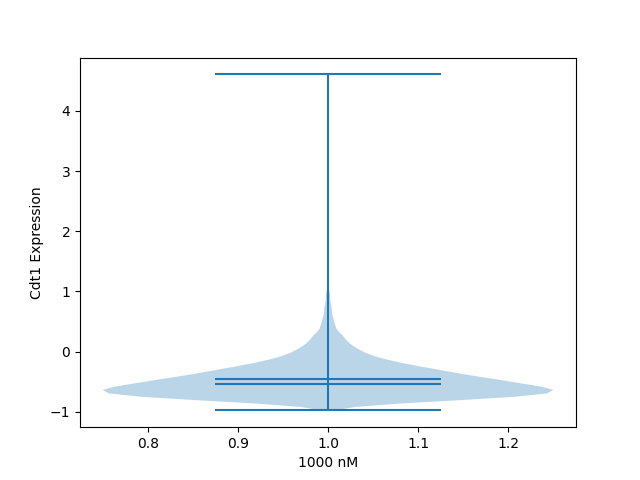

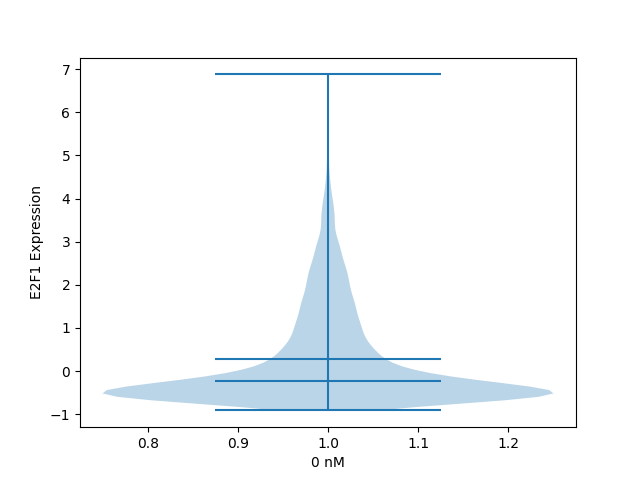

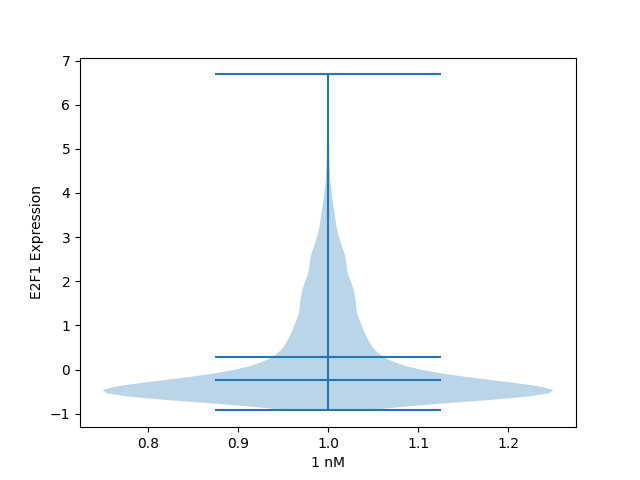

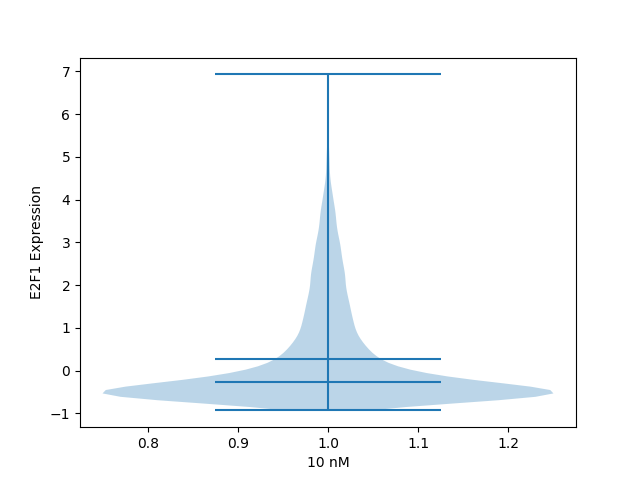

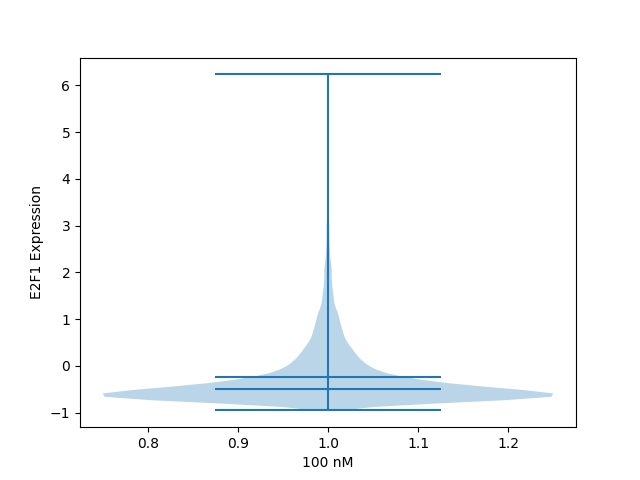

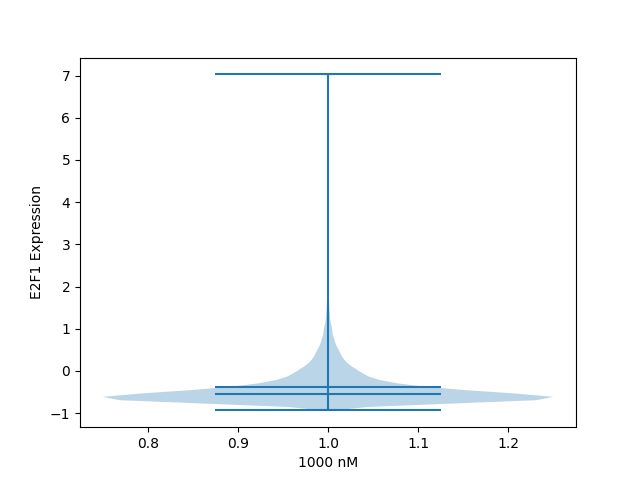

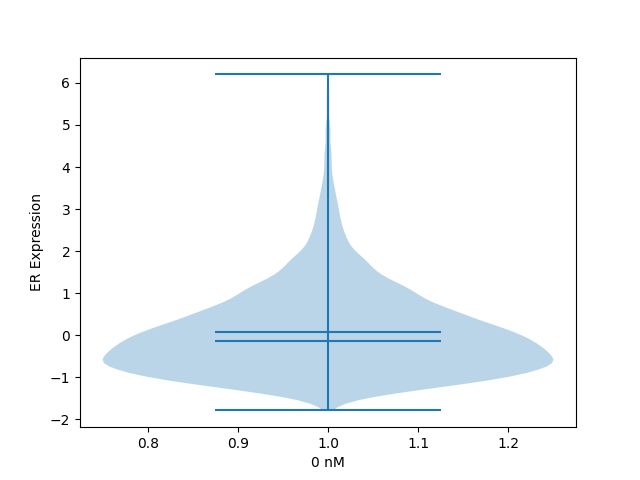

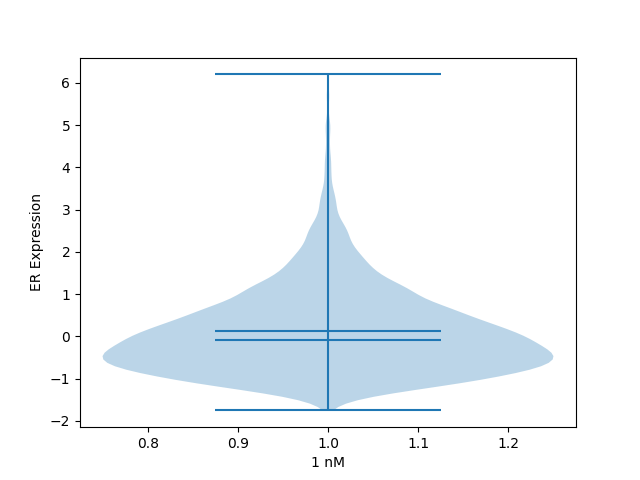

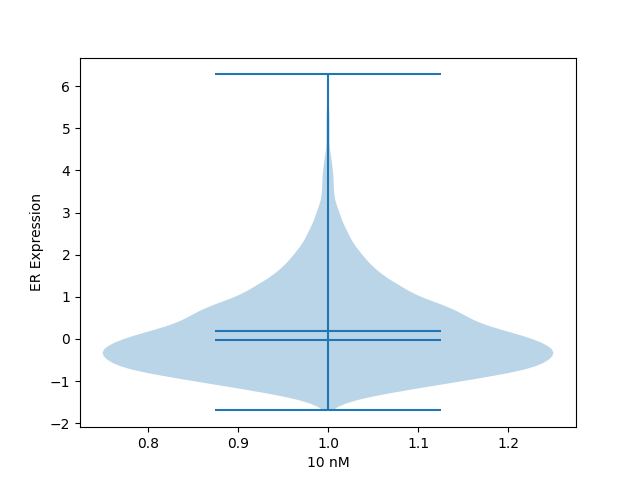

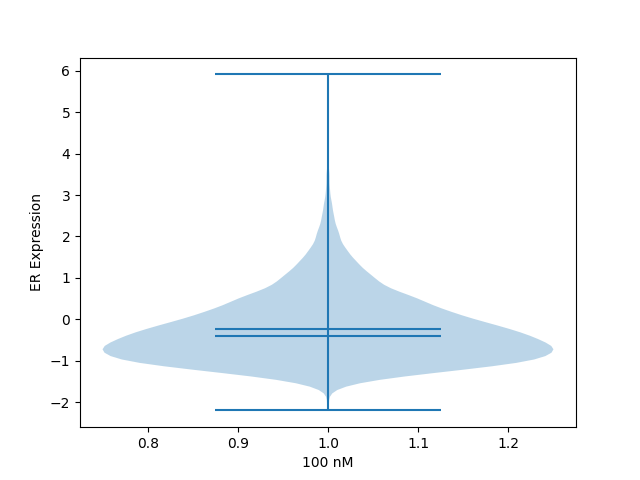

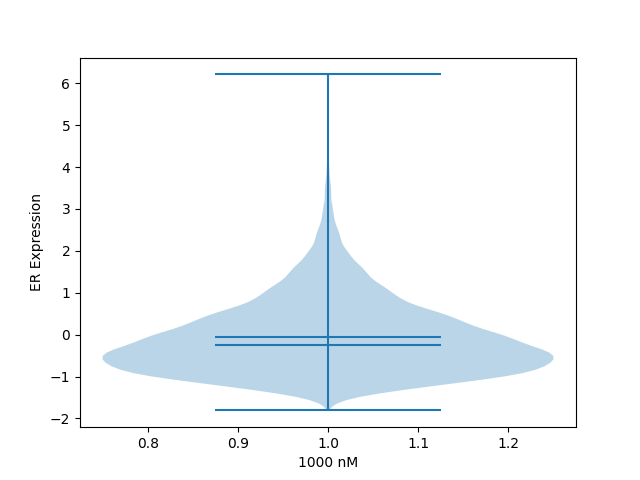

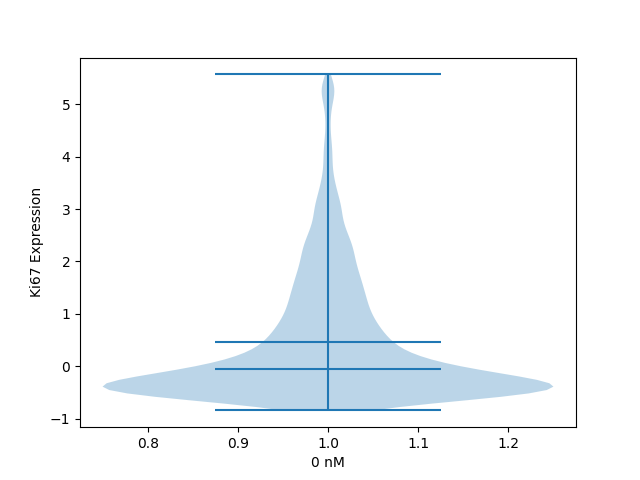

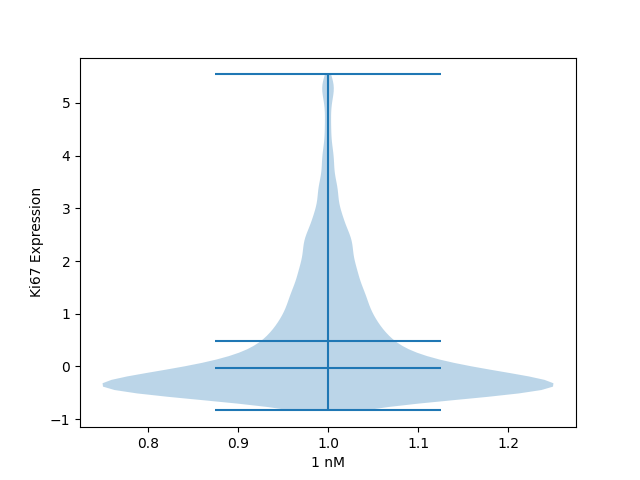

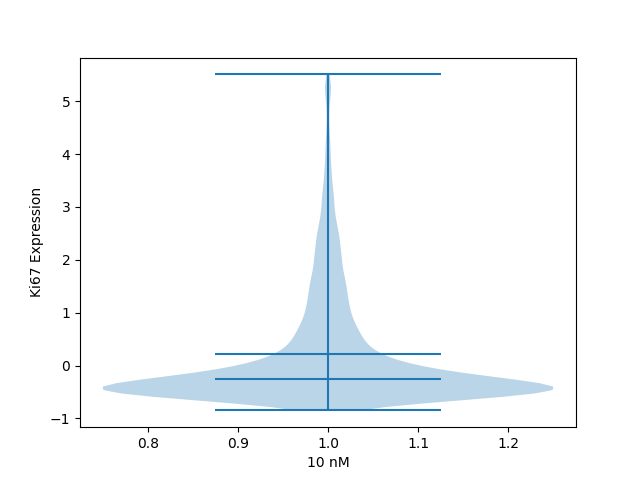

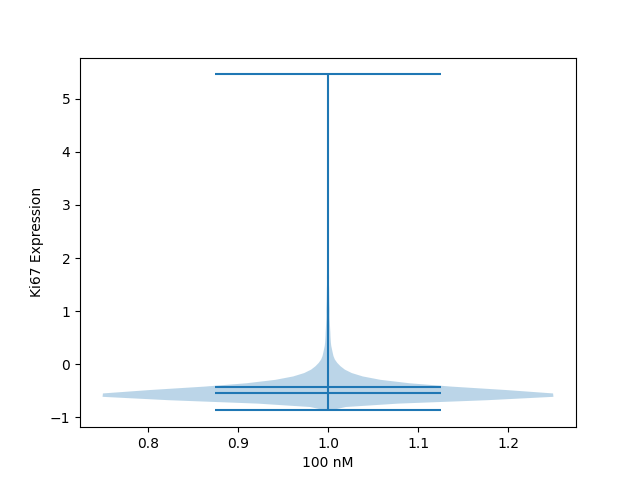

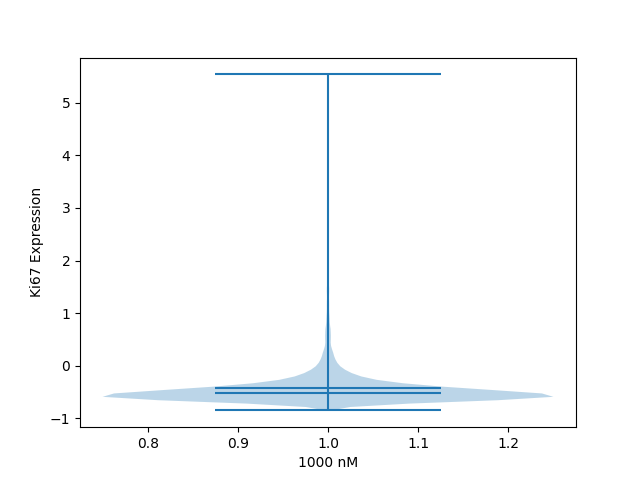

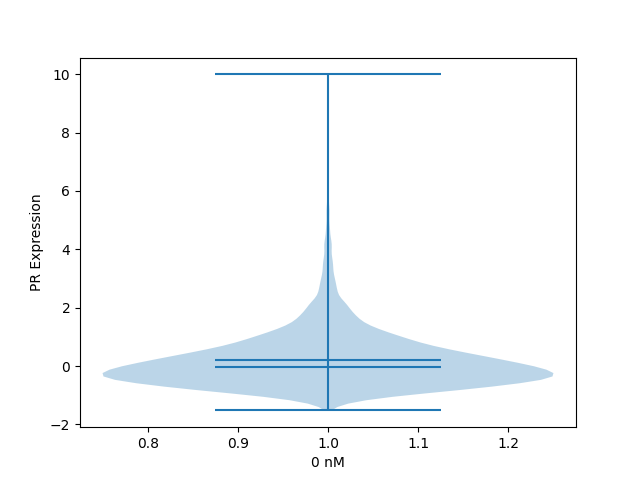

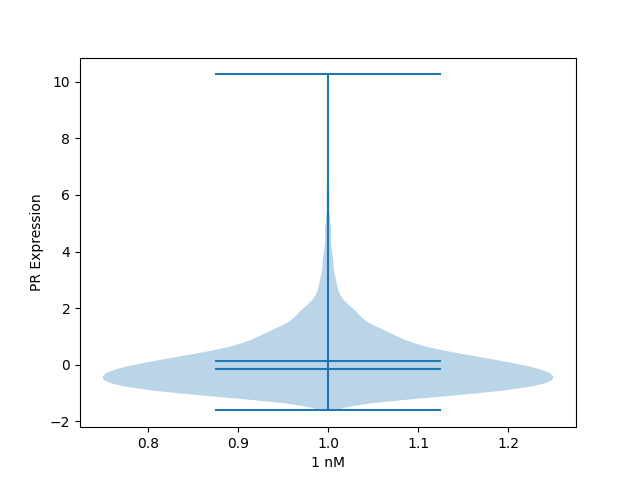

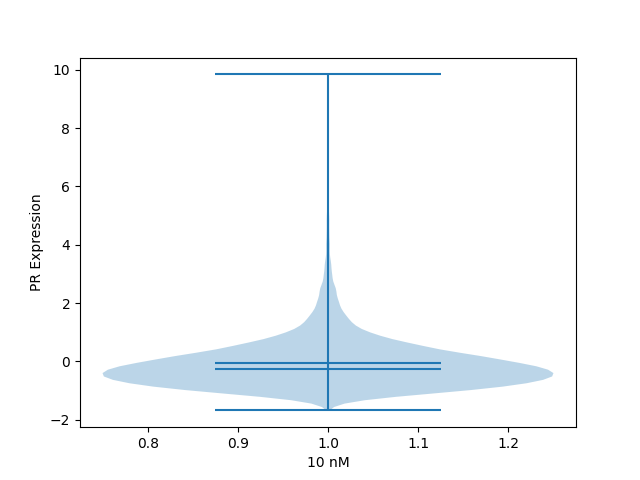

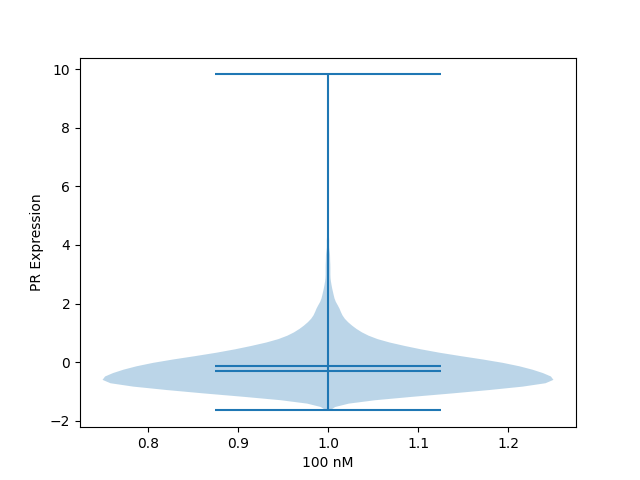

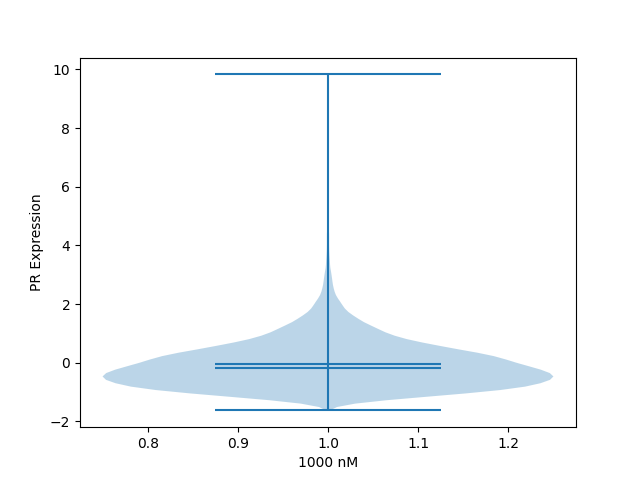

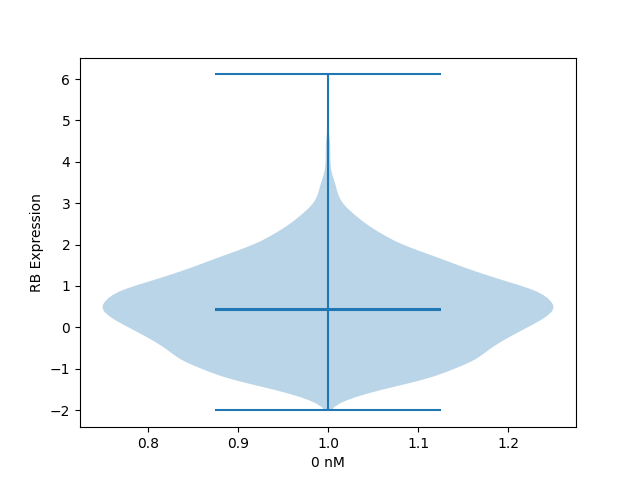

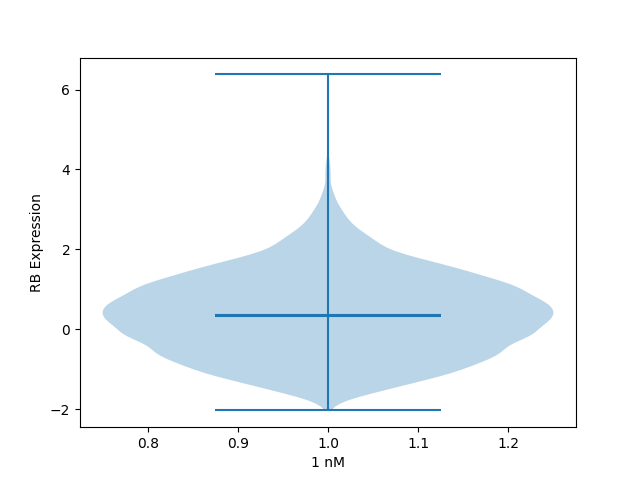

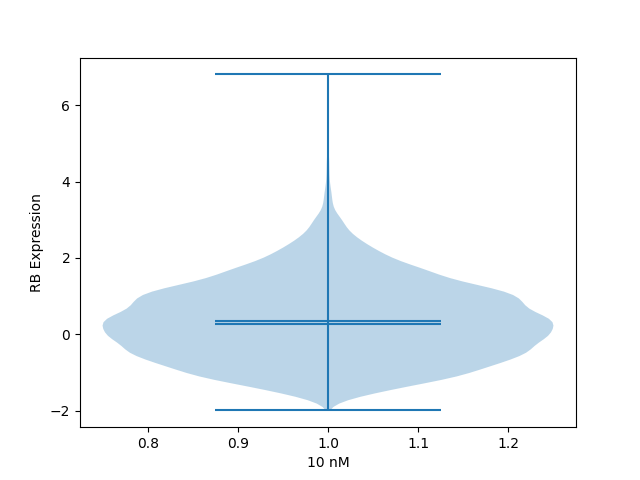

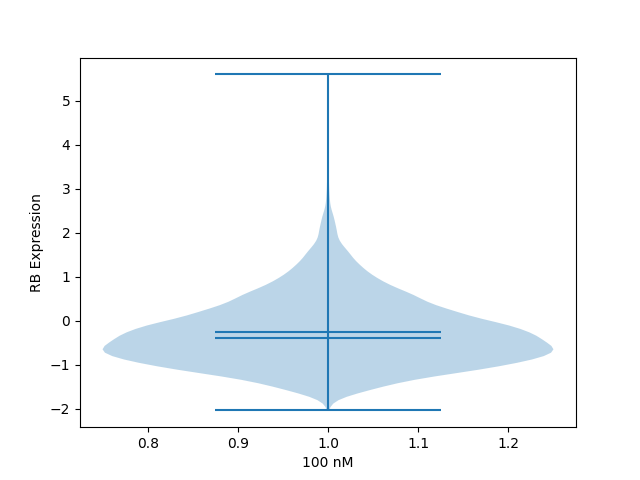

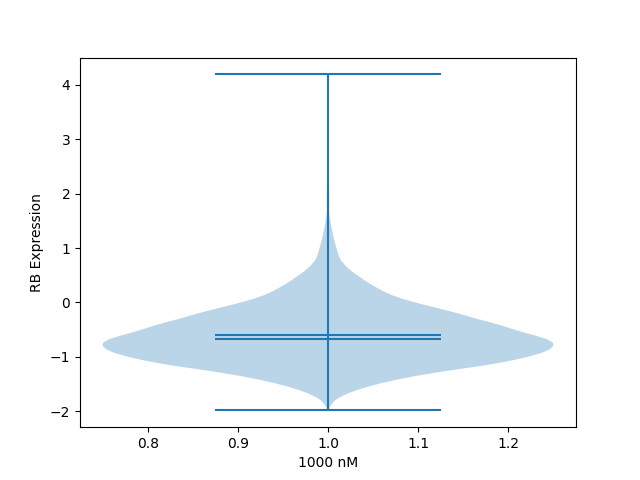

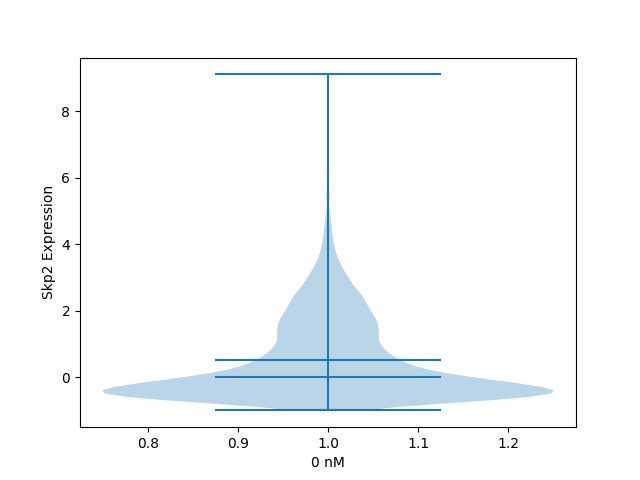

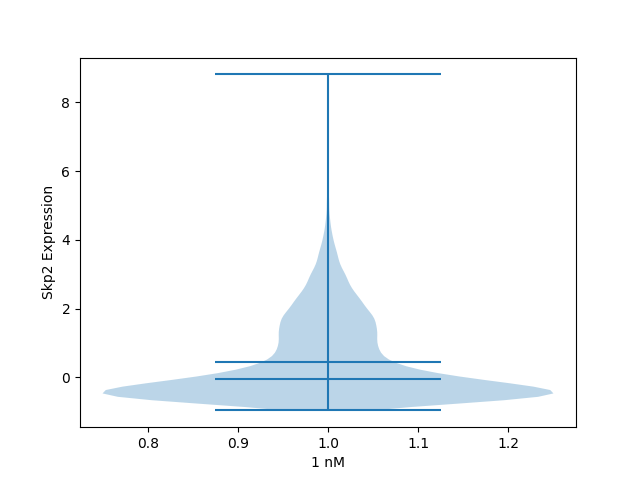

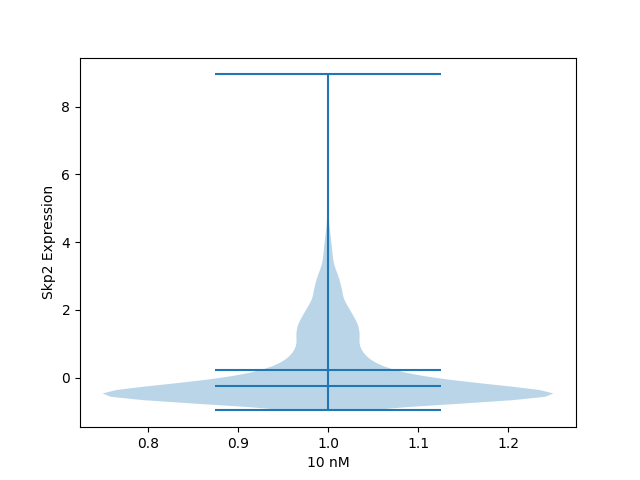

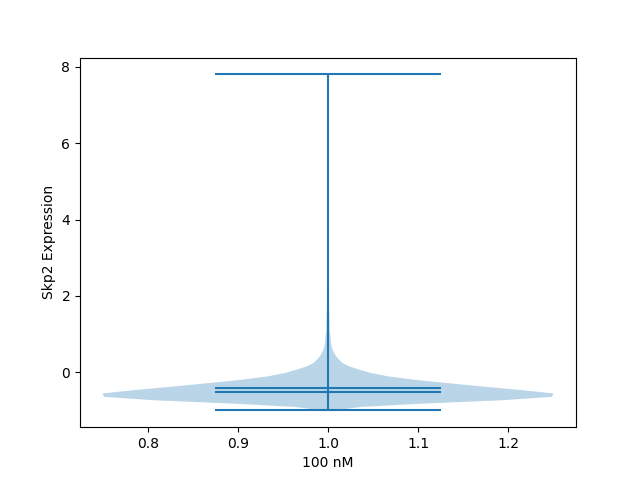

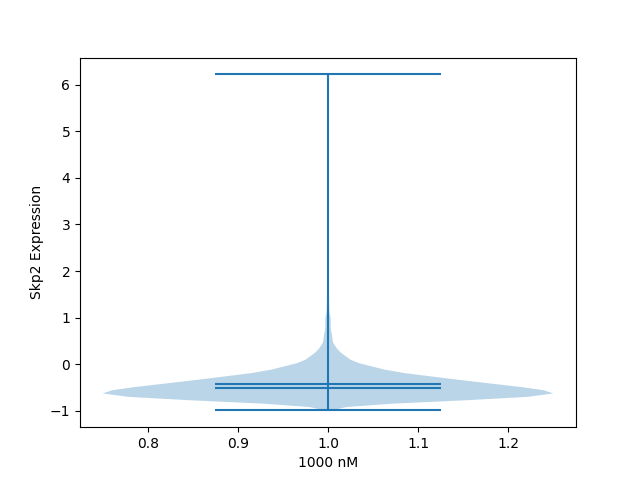

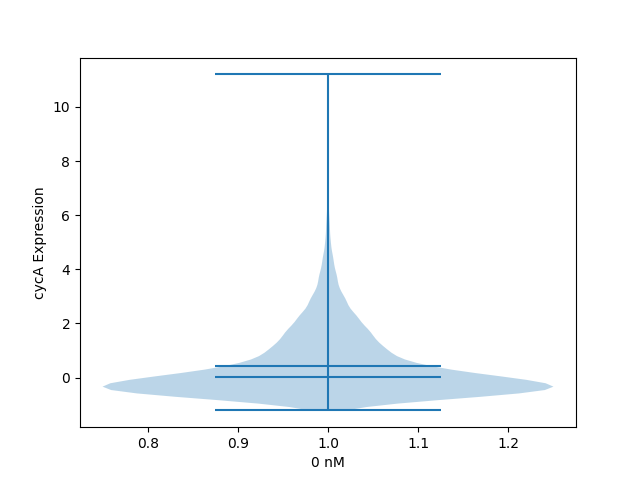

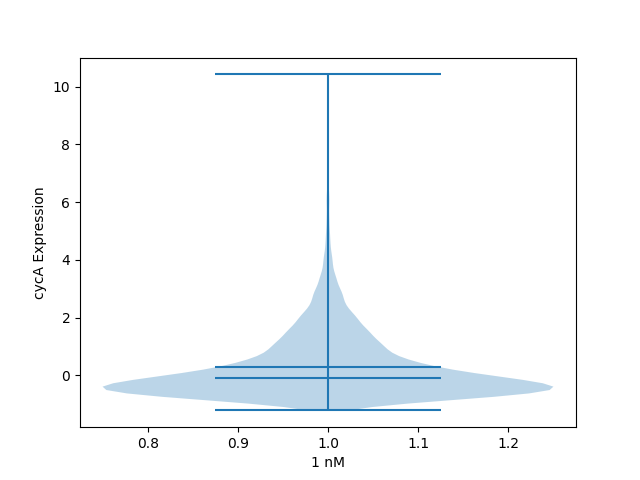

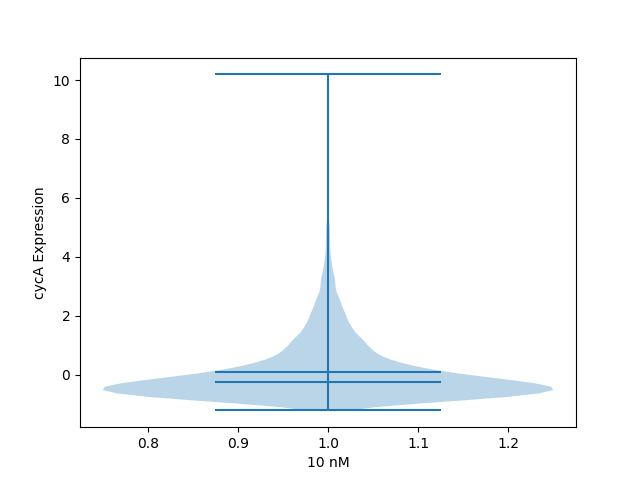

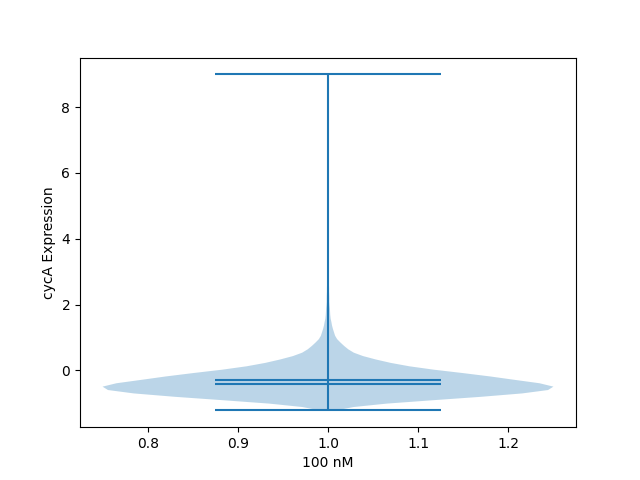

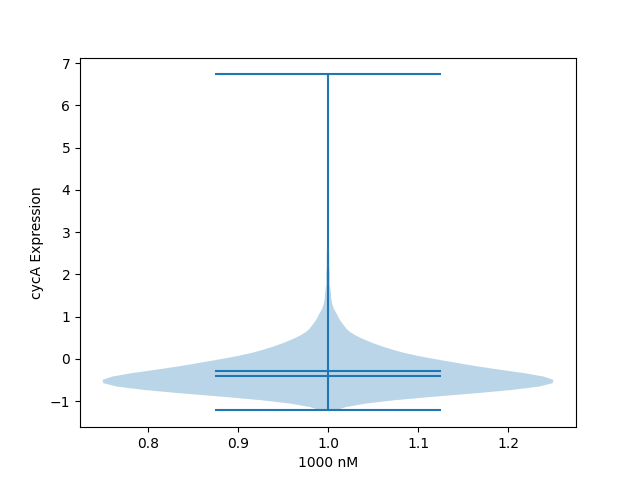

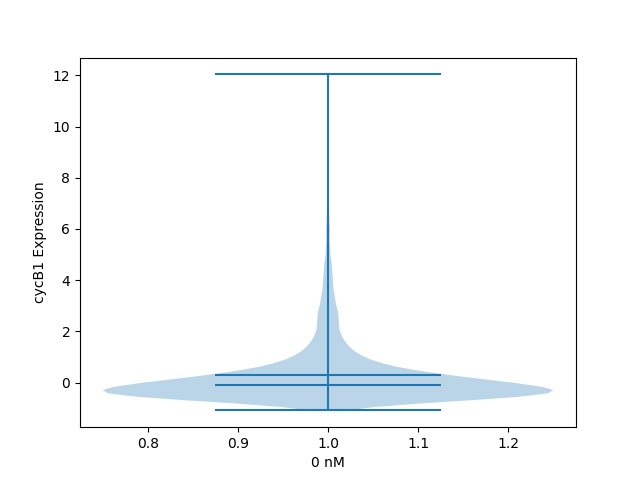

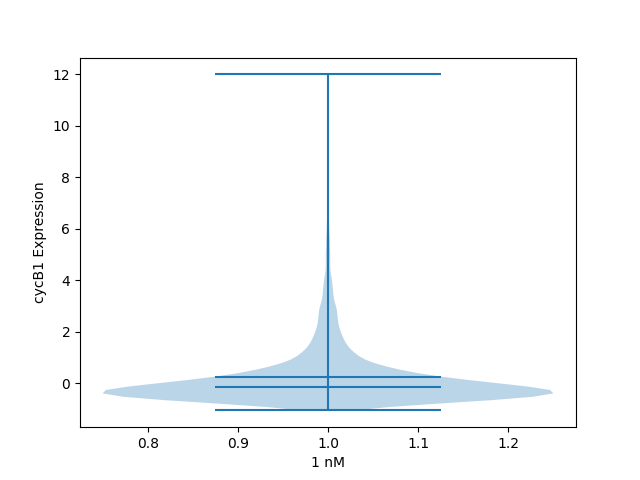

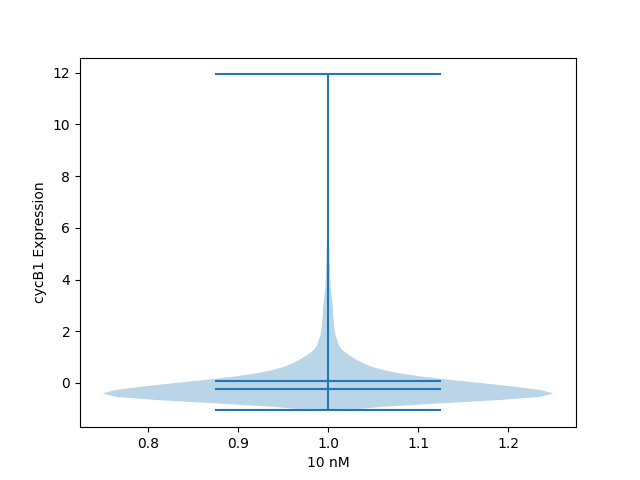

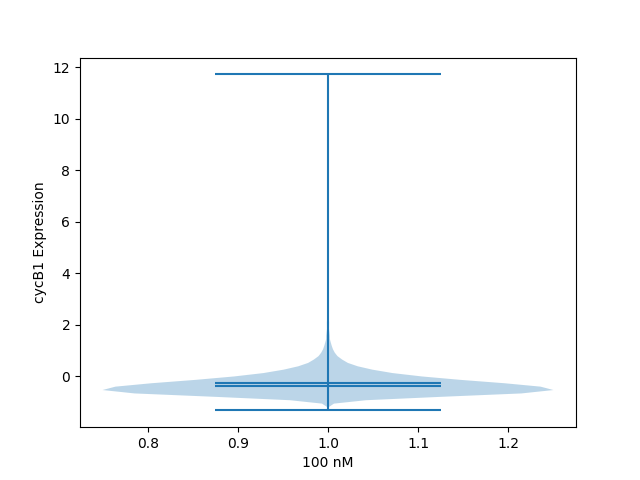

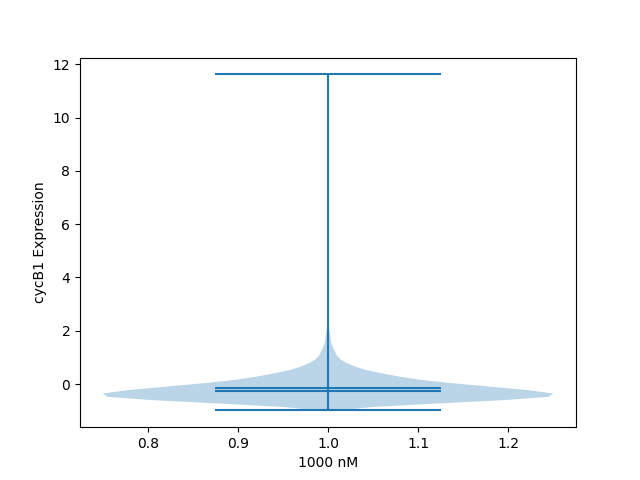

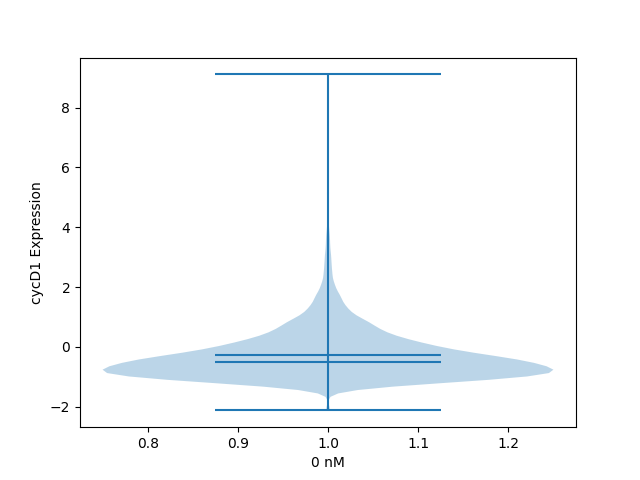

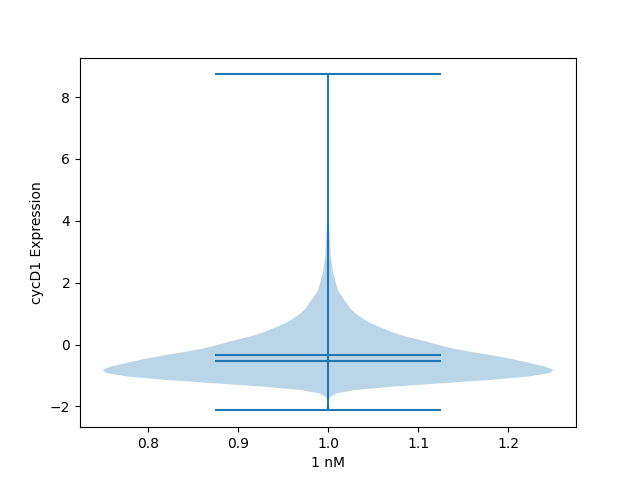

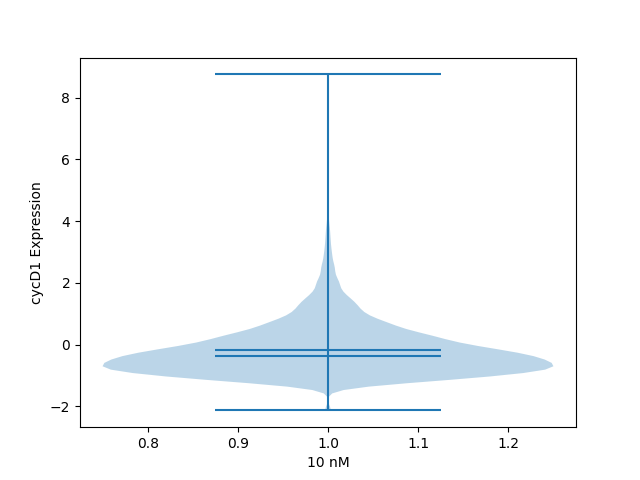

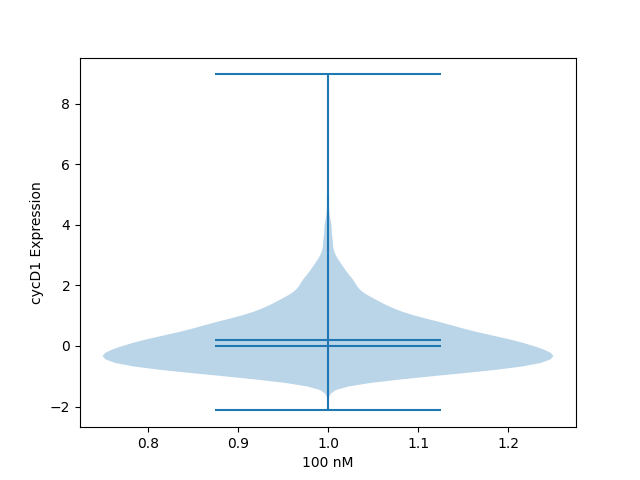

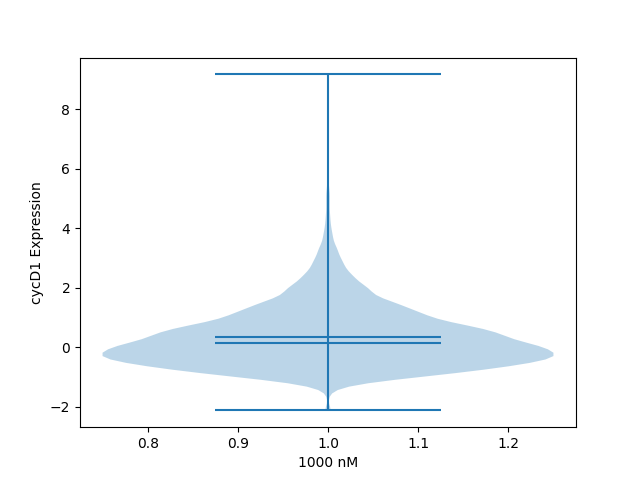

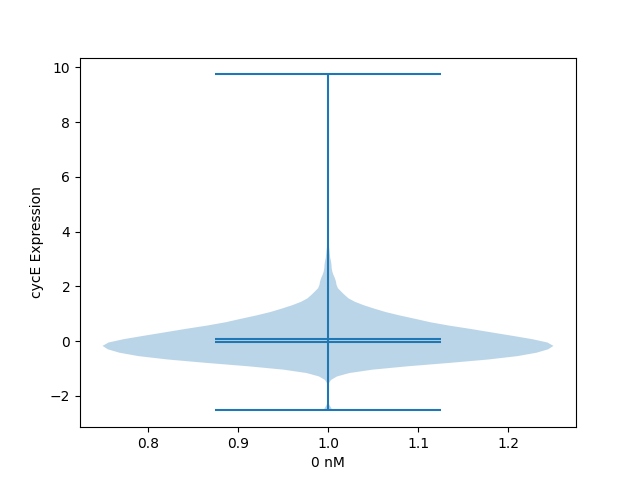

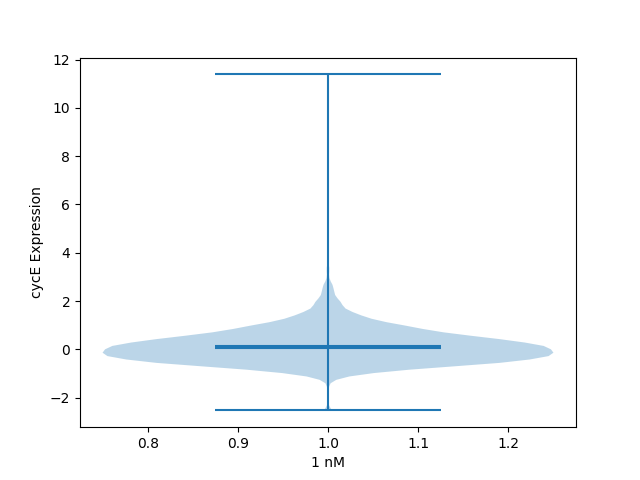

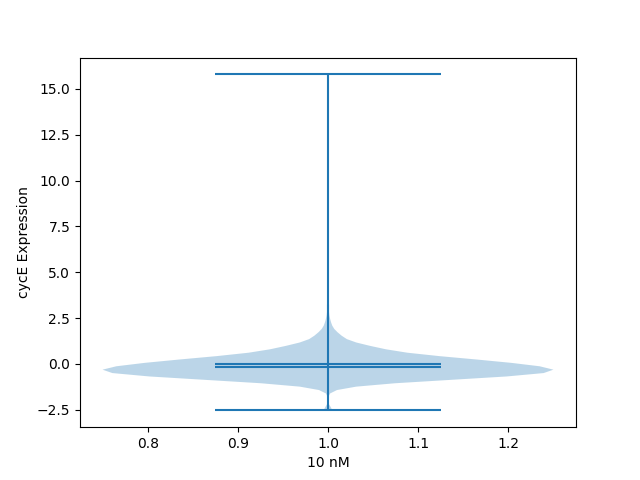

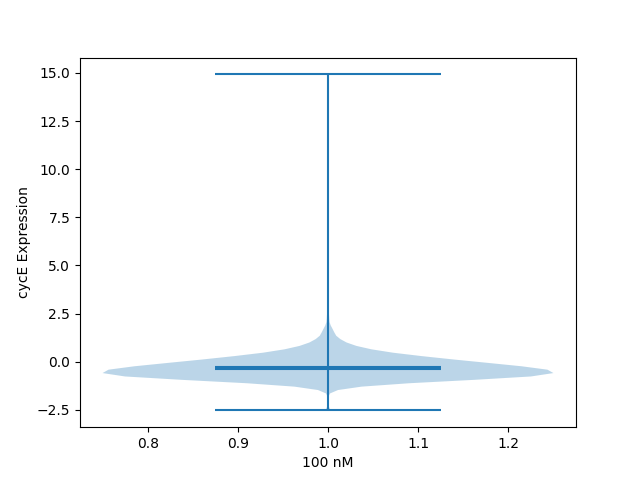

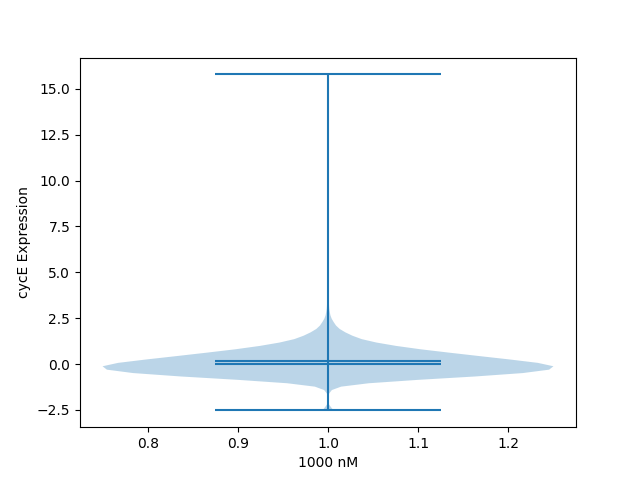

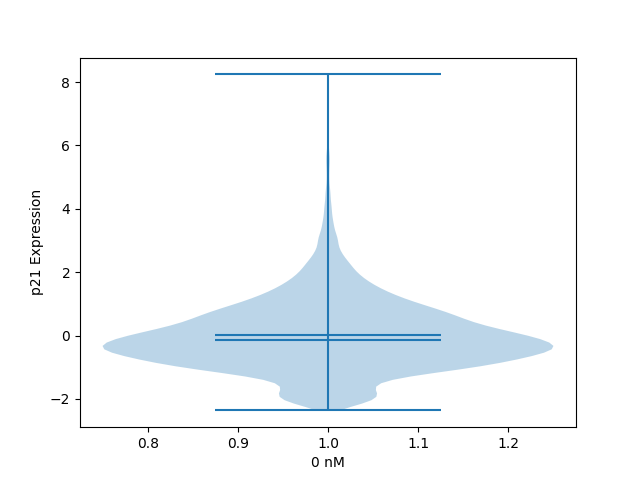

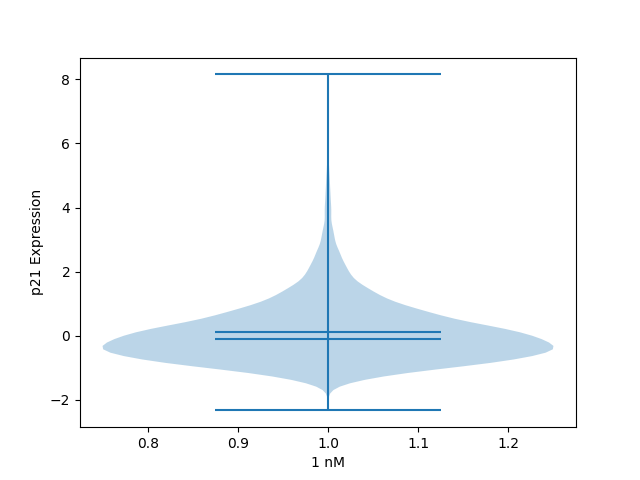

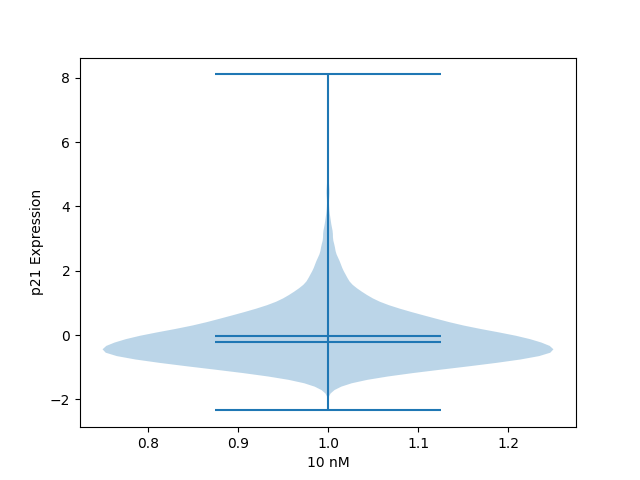

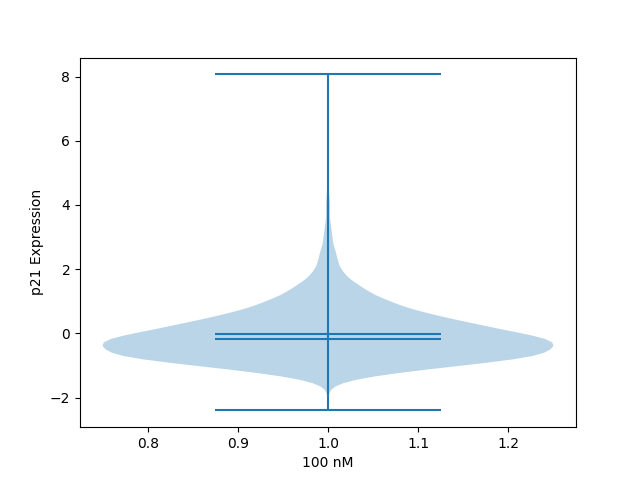

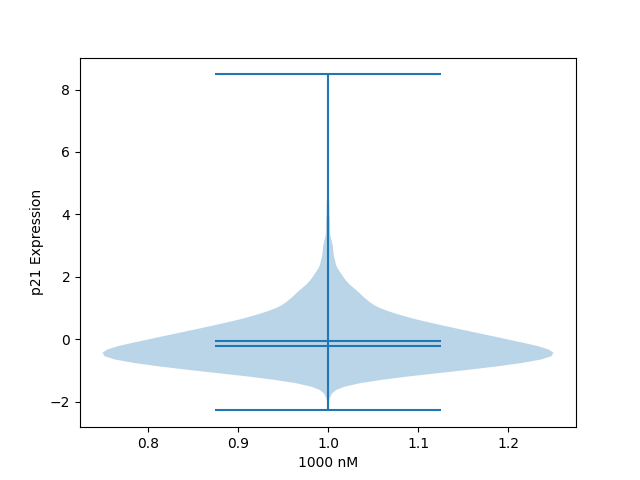

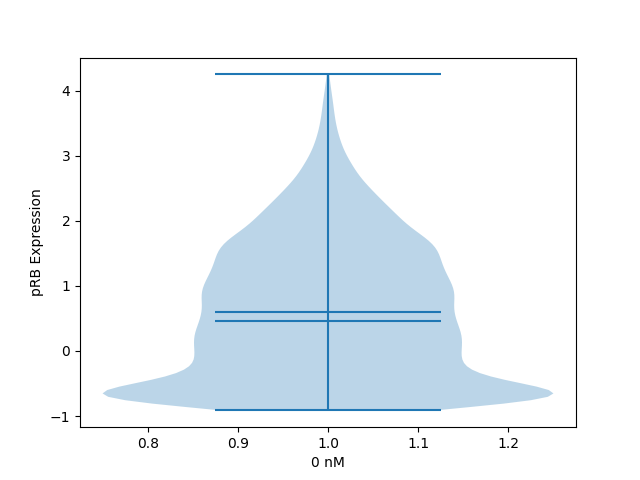

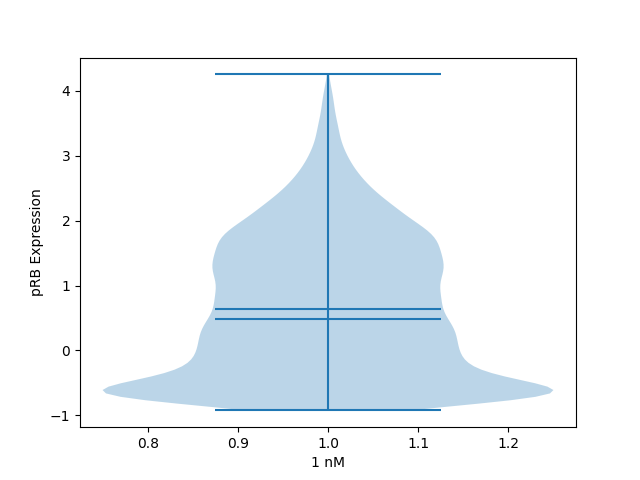

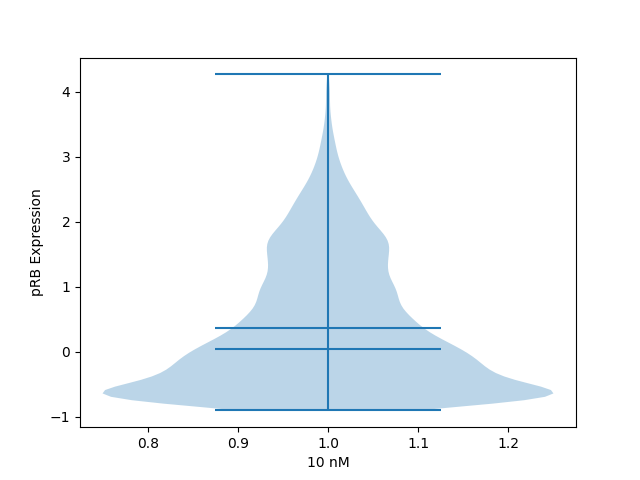

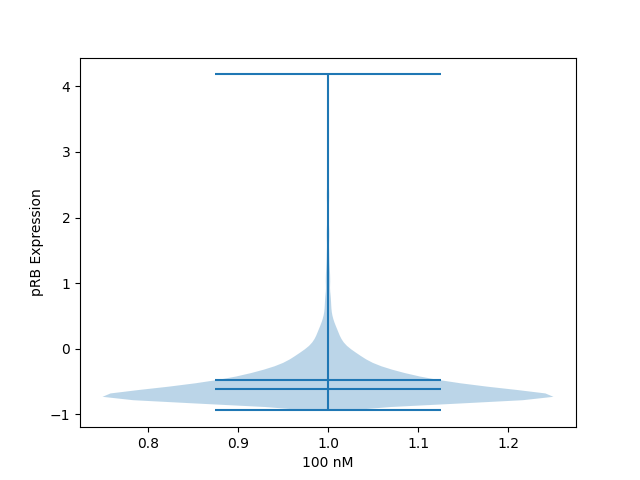

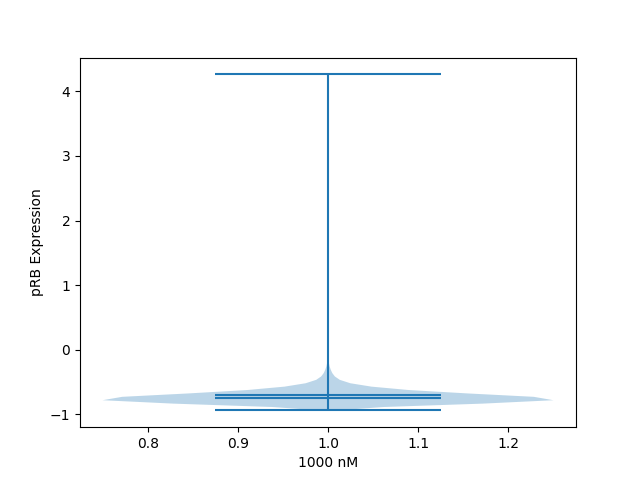

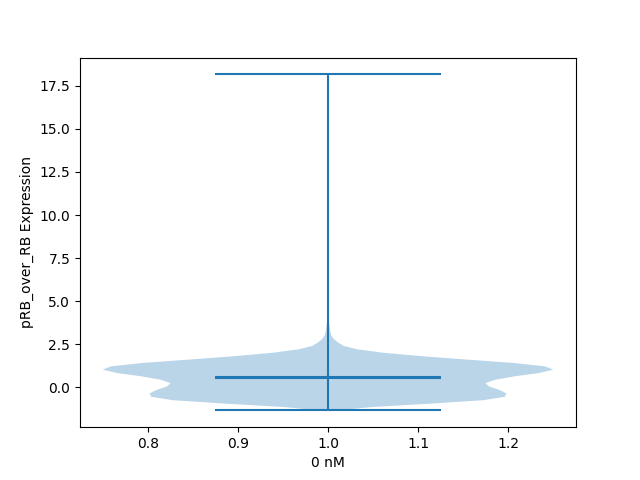

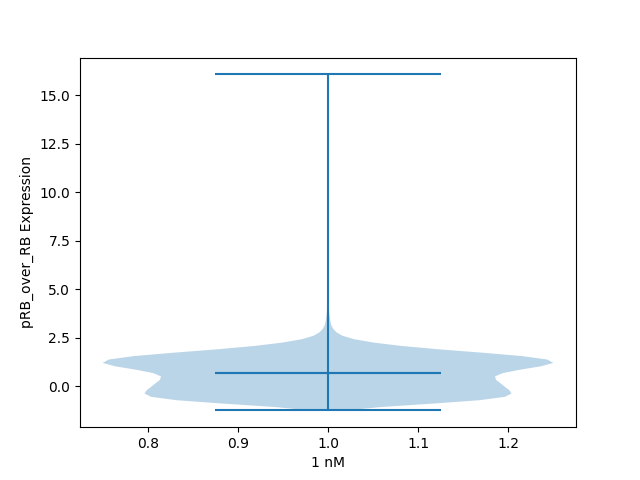

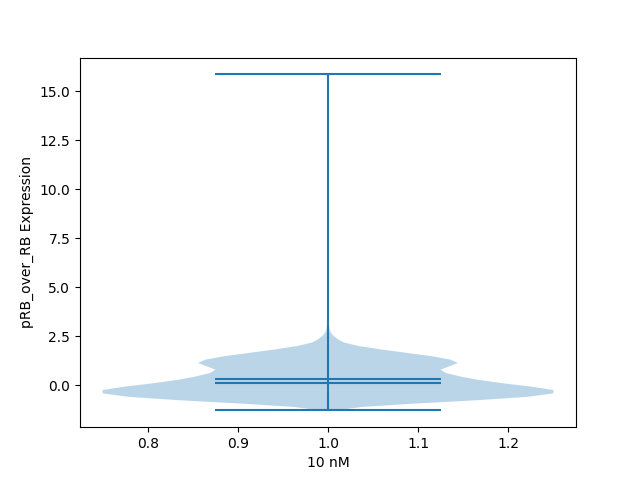

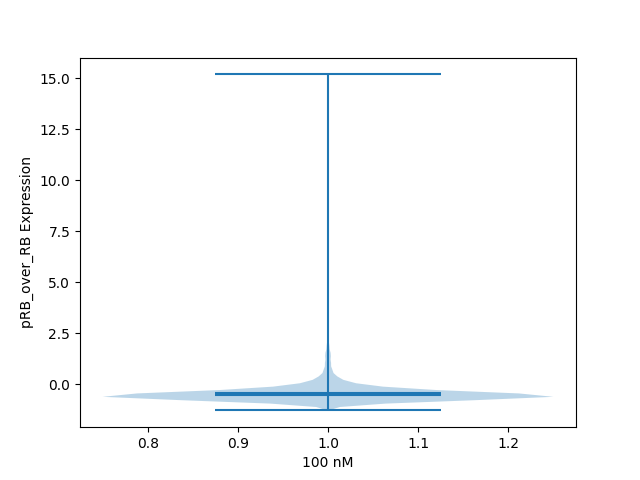

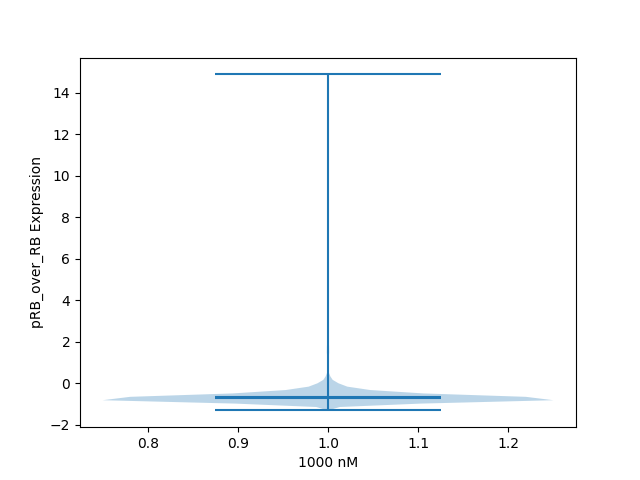

In [80]:
# violin plots 
for i in range(len(feature_cols)):
    for j in range(1, len(trt_conditions)): 
        fig, ax = plt.subplots()
        ax.violinplot(vars()[f'x{trt_conditions[j]}'][feature_cols[i]], showextrema=True, showmeans=True, showmedians=True)
        ax.set_xlabel(f'{trt_conditions[j]} nM')
        ax.set_ylabel(f'{features[i]} Expression')
        plt.savefig(f'figures/feature_means/{trt_conditions[j]}_{features[i]}.pdf', format="pdf", bbox_inches="tight")

## Perform PCA 

In [81]:
x

AreaShape_Area  Intensity_IntegratedIntensity_DNA  \
0           -0.926708                          -0.458879   
1           -1.245438                          -0.453973   
2           -0.428693                          -0.524069   
3            0.773184                           1.365078   
4           -0.415413                          -0.513221   
...               ...                                ...   
64497       -1.411443                          -1.082969   
64498        0.507576                           1.177778   
64499       -0.561497                          -0.439588   
64500       -0.335730                          -0.416980   
64501        0.122444                          -0.613439   

       Intensity_MedianIntensity_CDK2  Intensity_MedianIntensity_CDK4  \
0                            1.322612                        0.976904   
1                            1.380743                        1.118071   
2                           -1.129765                       -1.111307   
3                            0.991996                       -0.003277   
4                            0.339845                       -0.884906   
...                               ...                             ...   
64497                       -0.837296                       -0.987452   
64498                        0.356194                       -0.490703   
64499                        0.278081                        2.664252   
64500                       -0.174246                       -0.227014   
64501                       -0.995338                       -0.996775   

       Intensity_MedianIntensity_CDK6  Intensity_MedianIntensity_Cdh1  \
0                            0.062764                        0.145205   
1                            0.339295                        0.705600   
2                           -0.609492                       -0.881059   
3                           -0.104108                        0.536806   
4                           -0.804970                       -0.016837   
...                               ...                             ...   
64497                       -0.249525                       -0.168751   
64498                        0.224868                       -0.185630   
64499                        0.582451                        0.286992   
64500                       -0.015904                        0.070936   
64501                        0.038925                       -0.266651   

       Intensity_MedianIntensity_Cdt1  Intensity_MedianIntensity_E2F1  \
0                            2.516578                        0.407586   
1                            0.356098                       -0.268247   
2                           -0.406767                       -0.756349   
3                           -0.377650                       -0.503954   
4                           -0.170920                       -0.630151   
...                               ...                             ...   
64497                       -0.245168                       -0.550887   
64498                       -0.415502                       -0.416346   
64499                       -0.127244                        0.002921   
64500                       -0.581469                        0.815381   
64501                       -0.572734                       -0.614507   

       Intensity_MedianIntensity_ER  Intensity_MedianIntensity_Ki67  \
0                          0.319061                        0.171325   
1                          1.292693                        0.778215   
2                         -1.394264                       -0.090779   
3                          0.457196                        3.020565   
4                         -0.713613                        1.364434   
...                             ...                             ...   
64497                      0.039448                       -0.447140   
64498                      1.000826                       -0.438872   
64499           

In [82]:
pca = PCA(n_components=3)
x_principalComponents = pca.fit_transform(x)
x_pca_coords = pd.DataFrame(data=x_principalComponents, columns = ['PCA_1', 'PCA_2', 'PCA_3'])

In [83]:
x_pca = x.copy()
x_pca['PCA_1'] = x_pca_coords['PCA_1']
x_pca['PCA_2'] = x_pca_coords['PCA_2']
x_pca['PCA_3'] = x_pca_coords['PCA_3']
x_pca['metadata_well'] = metadata_well
x_pca['phase'] = phase
x_pca

AreaShape_Area  Intensity_IntegratedIntensity_DNA  \
0           -0.926708                          -0.458879   
1           -1.245438                          -0.453973   
2           -0.428693                          -0.524069   
3            0.773184                           1.365078   
4           -0.415413                          -0.513221   
...               ...                                ...   
64497       -1.411443                          -1.082969   
64498        0.507576                           1.177778   
64499       -0.561497                          -0.439588   
64500       -0.335730                          -0.416980   
64501        0.122444                          -0.613439   

       Intensity_MedianIntensity_CDK2  Intensity_MedianIntensity_CDK4  \
0                            1.322612                        0.976904   
1                            1.380743                        1.118071   
2                           -1.129765                       -1.111307   
3                            0.991996                       -0.003277   
4                            0.339845                       -0.884906   
...                               ...                             ...   
64497                       -0.837296                       -0.987452   
64498                        0.356194                       -0.490703   
64499                        0.278081                        2.664252   
64500                       -0.174246                       -0.227014   
64501                       -0.995338                       -0.996775   

       Intensity_MedianIntensity_CDK6  Intensity_MedianIntensity_Cdh1  \
0                            0.062764                        0.145205   
1                            0.339295                        0.705600   
2                           -0.609492                       -0.881059   
3                           -0.104108                        0.536806   
4                           -0.804970                       -0.016837   
...                               ...                             ...   
64497                       -0.249525                       -0.168751   
64498                        0.224868                       -0.185630   
64499                        0.582451                        0.286992   
64500                       -0.015904                        0.070936   
64501                        0.038925                       -0.266651   

       Intensity_MedianIntensity_Cdt1  Intensity_MedianIntensity_E2F1  \
0                            2.516578                        0.407586   
1                            0.356098                       -0.268247   
2                           -0.406767                       -0.756349   
3                           -0.377650                       -0.503954   
4                           -0.170920                       -0.630151   
...                               ...                             ...   
64497                       -0.245168                       -0.550887   
64498                       -0.415502                       -0.416346   
64499                       -0.127244                        0.002921   
64500                       -0.581469                        0.815381   
64501                       -0.572734                       -0.614507   

       Intensity_MedianIntensity_ER  Intensity_MedianIntensity_Ki67  ...  \
0                          0.319061                        0.171325  ...   
1                          1.292693                        0.778215  ...   
2                         -1.394264                       -0.090779  ...   
3                          0.457196                        3.020565  ...   
4                         -0.713613                        1.364434  ...   
...                             ...                             ...  ...   
64497                      0.039448                       -0.447140  ...   
64498                      1.000826            

In [84]:
x_pca.to_csv('data/T47D_PCA.csv', index=False)

## Perform PHATE

In [85]:
import phate
phate_op = phate.PHATE(n_components = 4, n_jobs = -1, knn = 200, t=12) 
phate_fit = phate_op.fit_transform(x)

Calculating PHATE...
  Running PHATE on 64502 observations and 20 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 94.87 seconds.
    Calculating affinities...
    Calculated affinities in 10.18 seconds.
  Calculated graph and diffusion operator in 107.85 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 89.53 seconds.
    Calculating KMeans...
    Calculated KMeans in 13.00 seconds.
  Calculated landmark operator in 107.45 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.65 seconds.
  Calculating metric MDS...


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 24.33 seconds.
Calculated PHATE in 240.33 seconds.


In [88]:
x_phate = x.copy()
x_phate["PHATE_1"] =  phate_fit[:,0]
x_phate["PHATE_2"] =  phate_fit[:,1]
x_phate["PHATE_3"] =  phate_fit[:,2]
x_phate['metadata_well'] = metadata_well
x_phate['phase'] = phase
x_phate

AreaShape_Area  Intensity_IntegratedIntensity_DNA  \
0           -0.926708                          -0.458879   
1           -1.245438                          -0.453973   
2           -0.428693                          -0.524069   
3            0.773184                           1.365078   
4           -0.415413                          -0.513221   
...               ...                                ...   
64497       -1.411443                          -1.082969   
64498        0.507576                           1.177778   
64499       -0.561497                          -0.439588   
64500       -0.335730                          -0.416980   
64501        0.122444                          -0.613439   

       Intensity_MedianIntensity_CDK2  Intensity_MedianIntensity_CDK4  \
0                            1.322612                        0.976904   
1                            1.380743                        1.118071   
2                           -1.129765                       -1.111307   
3                            0.991996                       -0.003277   
4                            0.339845                       -0.884906   
...                               ...                             ...   
64497                       -0.837296                       -0.987452   
64498                        0.356194                       -0.490703   
64499                        0.278081                        2.664252   
64500                       -0.174246                       -0.227014   
64501                       -0.995338                       -0.996775   

       Intensity_MedianIntensity_CDK6  Intensity_MedianIntensity_Cdh1  \
0                            0.062764                        0.145205   
1                            0.339295                        0.705600   
2                           -0.609492                       -0.881059   
3                           -0.104108                        0.536806   
4                           -0.804970                       -0.016837   
...                               ...                             ...   
64497                       -0.249525                       -0.168751   
64498                        0.224868                       -0.185630   
64499                        0.582451                        0.286992   
64500                       -0.015904                        0.070936   
64501                        0.038925                       -0.266651   

       Intensity_MedianIntensity_Cdt1  Intensity_MedianIntensity_E2F1  \
0                            2.516578                        0.407586   
1                            0.356098                       -0.268247   
2                           -0.406767                       -0.756349   
3                           -0.377650                       -0.503954   
4                           -0.170920                       -0.630151   
...                               ...                             ...   
64497                       -0.245168                       -0.550887   
64498                       -0.415502                       -0.416346   
64499                       -0.127244                        0.002921   
64500                       -0.581469                        0.815381   
64501                       -0.572734                       -0.614507   

       Intensity_MedianIntensity_ER  Intensity_MedianIntensity_Ki67  ...  \
0                          0.319061                        0.171325  ...   
1                          1.292693                        0.778215  ...   
2                         -1.394264                       -0.090779  ...   
3                          0.457196                        3.020565  ...   
4                         -0.713613                        1.364434  ...   
...                             ...                             ...  ...   
64497                      0.039448                       -0.447140  ...   
64498                      1.000826            

In [89]:
x_phate.to_csv("data/T47D_PHATE.csv", index=False)